In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import missingno as msno
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from scipy.stats import zscore
from scipy.stats import median_abs_deviation
from scipy.stats.mstats import winsorize


In [2]:
# Importamos dataset
bmw = pd.read_csv("bmw_pricing_v3.csv")

**ANÁLISIS**

ANÁLISIS GENERAL - ESTRUCTURA DE DATOS

In [3]:
# Entender el dataset
# Parece un dataset donde todos los coches son de marca bmw, coches de segundo mano (ya hay km y recorrido), y fecha de venta, coches ya vendidos
bmw.head ()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [4]:
bmw.info ()
# Tenemos booleanas, floats y objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
# Cuantos registros hay en total
bmw.size

87174

In [6]:
# Tamaño del dataset
bmw.shape

(4843, 18)

In [7]:
# Total de filas
len(bmw)

4843

ANALISIS CORRELACION INICIAL

In [8]:
# Análisis de correlación inicial, hay alguna variable correlacionada?

In [9]:
# Hacemos una correlación para detectar si hay variables que explican lo mismo (lo va a hacer solamente con numericos)
corr = bmw.corr(numeric_only=True)

In [10]:
# No se observa una correlación directa inicial entre los diferentes campos
# Hay algo de correlacion entre precio y potencia
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,gps,precio
km,1.000000,-0.050141,0.154815,-0.410189
potencia,-0.050141,1.000000,0.008862,0.639254
gps,0.154815,0.008862,1.000000,-0.005227
precio,-0.410189,0.639254,-0.005227,1.000000


ANÁLISIS DUPLICADOS

In [11]:
# Analizamos duplicados en nuestro dataset. # No hay duplicados
bmw[bmw.duplicated]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


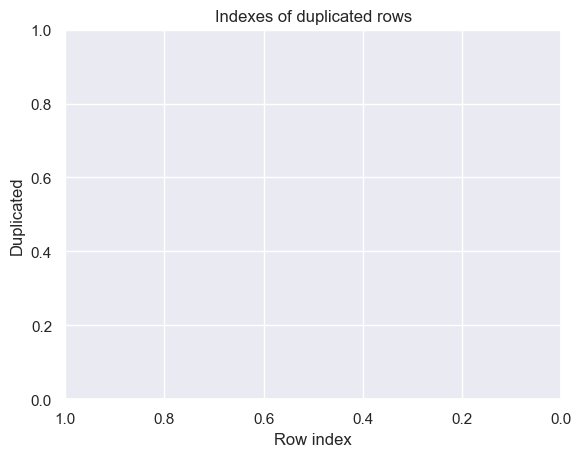

In [12]:
# Funcion para ver duplicados en el dataset. No hay duplicados
duplicated_rows = pd.DataFrame({
    'duplicated': bmw.duplicated(),
    'row': range(1, len(bmw) + 1)
})


duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

plt.figure()
plt.vlines(duplicated_rows['row'], ymin=0, ymax=1, colors='black')
plt.gca().invert_xaxis()
plt.title('Indexes of duplicated rows')
plt.xlabel('Row index')
plt.ylabel('Duplicated')
plt.show()

ANÁLISIS UNIVARIABLE - COLUMNA A COLUMNA 

In [13]:
# Saber cuantos valores tenemos de cada variable (dentro de cada columna)
for i in bmw:
  print(i, bmw[i].value_counts())

marca marca
BMW    3873
Name: count, dtype: int64
modelo modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
km km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64
potencia potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64
fecha_registro fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dty

In [14]:
# Analizar la columna marca
bmw["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [15]:
# Analizar la columna modelo
bmw["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [16]:
# Visualizar ambas columnas: marca y modelo
bmw[["marca", "modelo"]]

,marca,modelo
0,NaN,118
1,BMW,M4
2,BMW,320
3,BMW,420
4,BMW,425
...,...,...
4838,BMW,218 Gran Tourer
4839,BMW,218 Active Tourer
4840,BMW,218 Gran Tourer
4841,BMW,218 Active Tourer


In [17]:
# Analizar la columna km
bmw["km"].value_counts()

km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64

<Axes: >

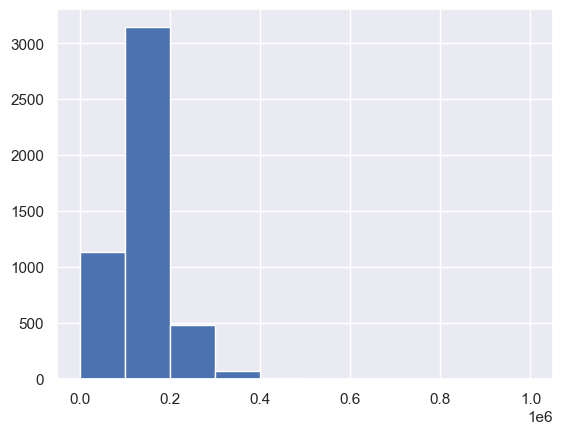

In [18]:
# Analizar el histograma de la columna km
bmw["km"].hist()

In [19]:
# Analizar la columna potencia
bmw["potencia"].value_counts()

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64

<Axes: >

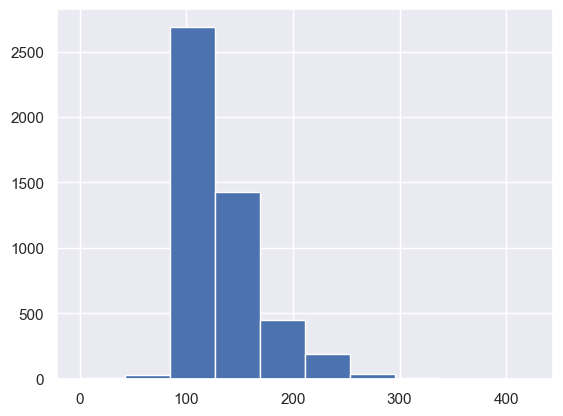

In [20]:
# Analizar el histograma de la columna potencia
bmw["potencia"].hist()

In [21]:
bmw.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [22]:
# Analizar la columna tipo_gasolina
bmw["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

<Axes: >

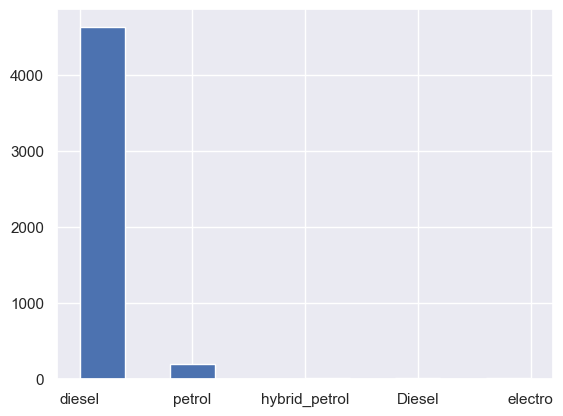

In [23]:
# Analizar el histograma de la columna tipo_gasolina
bmw["tipo_gasolina"].hist()

In [24]:
# Analizar la columna color
bmw["color"].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

<Axes: >

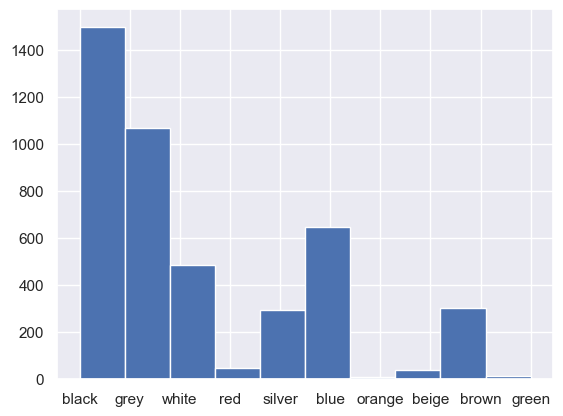

In [25]:
# Analizar el histograma de la columna color
bmw["color"].hist()

In [26]:
# Analizar la columna tipo_coche
bmw["tipo_coche"].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [27]:
# Analizar la columna volante_regulable
bmw["volante_regulable"].value_counts()

volante_regulable
True     2662
False    2177
Name: count, dtype: int64

In [28]:
# Analizar la columna aire_acondicionado
bmw["aire_acondicionado"].value_counts()

aire_acondicionado
True     3465
False     892
Name: count, dtype: int64

In [29]:
# Analizar la columna camara_trasera
bmw["camara_trasera"].value_counts()

camara_trasera
False    3864
True      977
Name: count, dtype: int64

In [30]:
# Analizar la columna asientos_traseros_plegables
bmw["asientos_traseros_plegables"].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [31]:
# Analizar la columna elevalunas_electrico
bmw["elevalunas_electrico"].value_counts()

elevalunas_electrico
False    2612
True     2229
Name: count, dtype: int64

In [32]:
# Analizar la columna bluetooth
bmw["bluetooth"].value_counts()

bluetooth
False    3119
True      996
Name: count, dtype: int64

In [33]:
# Analizar la columna gps
bmw["gps"].value_counts()

gps
True     4514
False     329
Name: count, dtype: int64

In [34]:
# Analizar la columna alerta_lim_velocidad
bmw["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2240
False    1875
Name: count, dtype: int64

In [35]:
# Analizar la columna precio
bmw["precio"].value_counts()

precio
13100.0    68
14900.0    65
11900.0    61
14300.0    60
13400.0    57
           ..
48200.0     1
41900.0     1
38800.0     1
28400.0     1
45100.0     1
Name: count, Length: 437, dtype: int64

<Axes: >

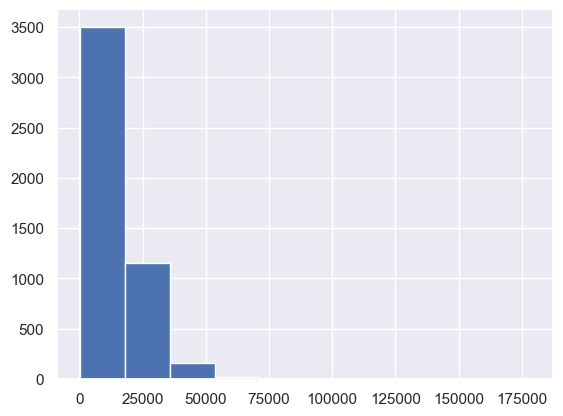

In [36]:
# Analizar el histograma de la columna precio
# No parece que hayan outliers
bmw["precio"].hist()

In [37]:
# Analizar el precio mínimo
bmw["precio"].min()

100.0

In [38]:
# Analizar el precio maximo
bmw["precio"].max()

178500.0

In [39]:
# Analizar el precio medio
bmw["precio"].mean()

15831.920611949556

In [40]:
# La media y la mediana se parecen bastante
bmw["precio"].describe()

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [41]:
# Comparando marca, modelo y precio
bmw[["marca", "modelo", "precio"]]

,marca,modelo,precio
0,NaN,118,11300.0
1,BMW,M4,69700.0
2,BMW,320,10200.0
3,BMW,420,25100.0
4,BMW,425,33400.0
...,...,...,...
4838,BMW,218 Gran Tourer,14600.0
4839,BMW,218 Active Tourer,17500.0
4840,BMW,218 Gran Tourer,17000.0
4841,BMW,218 Active Tourer,22700.0


In [43]:
modelo_barato = bmw[bmw["precio"] == bmw["precio"].min()]["modelo"].values[0]

In [44]:
modelo_barato

'320'

In [45]:
# Un outlier, precio muy barato
bmw["precio"].min()

100.0

In [46]:
# Hay coches muy baratos, no sé si considerarlos outliers
bmw[bmw["precio"] < 500 ]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,NaN,320,179358.0,120.0,2013-06-01,diesel,black,NaN,False,True,False,NaN,False,False,True,True,100.0,2018-03-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,NaN,False,False,False,True,100.0,2018-04-01
1255,BMW,320,170381.0,135.0,NaN,diesel,silver,NaN,True,True,False,NaN,False,False,True,False,100.0,2018-05-01
1513,BMW,520,358332.0,100.0,NaN,diesel,blue,NaN,False,False,False,NaN,True,False,True,False,400.0,2018-07-01
1558,BMW,520,358333.0,100.0,NaN,diesel,blue,estate,False,False,False,NaN,True,NaN,True,NaN,400.0,2018-07-01
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,NaN,False,False,True,NaN,100.0,2018-03-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,NaN,sedan,False,NaN,False,False,False,False,True,NaN,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,NaN,False,False,False,NaN,True,False,200.0,2018-08-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01


In [47]:
# Analizar la columna "fecha_registro"
bmw["fecha_registro"].value_counts()


fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dtype: int64

VISUALIZACION DE DATOS

In [48]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

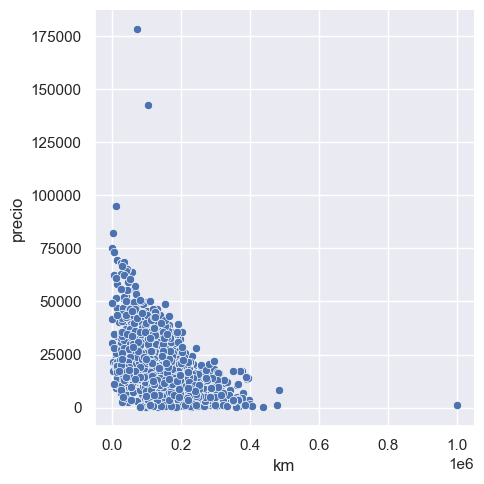

In [49]:
# Hacer un scatterplot con km y precio
sns.relplot(x="km", y="precio", data=bmw);

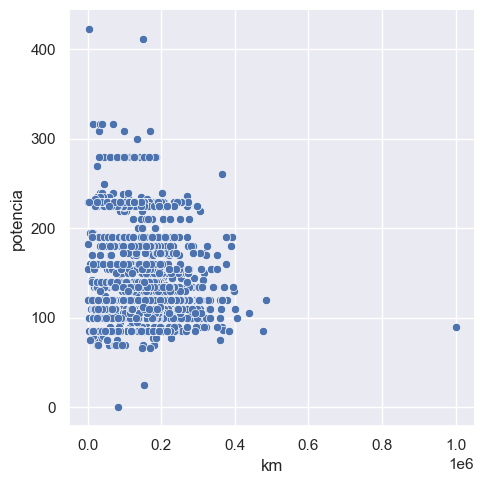

In [50]:
# Hacer un scatterplot con km y potencia
sns.relplot(x="km", y="potencia", data=bmw);

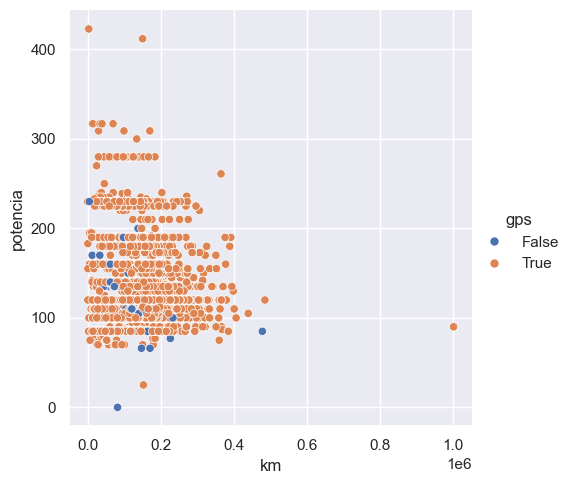

In [51]:
# Hacer un scatter plot con diferencias categoricas
sns.relplot(x="km", y="potencia", hue="gps", data=bmw);

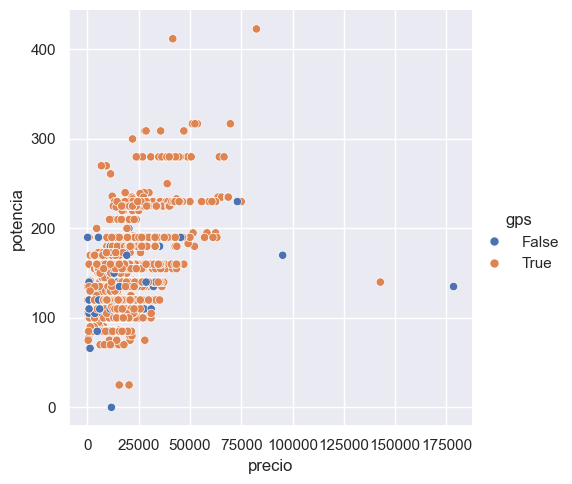

In [52]:
# Hacer un scatter plot con diferencias categoricas
sns.relplot(x="precio", y="potencia", hue="gps", data=bmw);

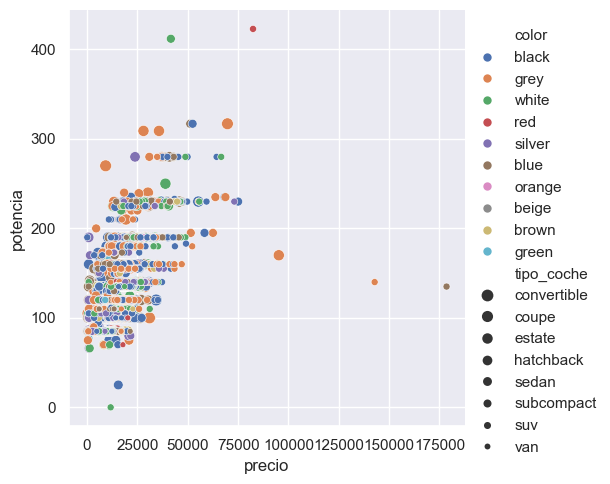

In [53]:
# Hacer un scatter plot con diferencias categoricas y tamaño
sns.relplot(x="precio", y="potencia", hue="color", size = "tipo_coche", data=bmw);

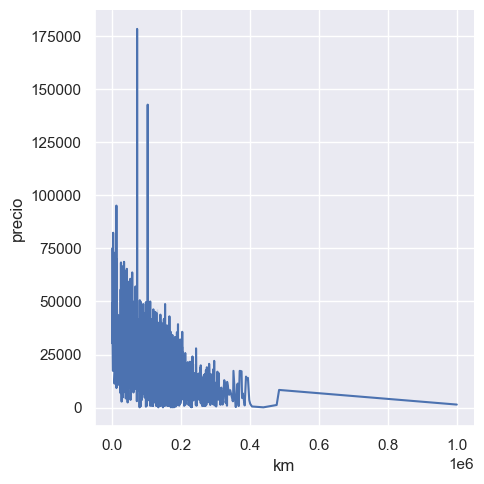

In [54]:
# Hacer un line plot con km y precio
sns.relplot(x="km", y="precio", kind="line",data=bmw);

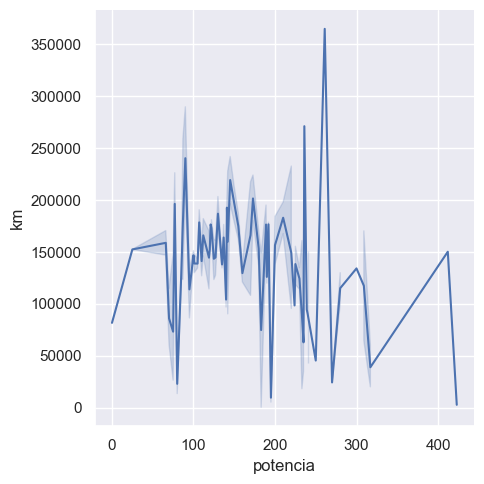

In [55]:
# Hacer un line plot con potencia y km
sns.relplot(x="potencia", y="km", kind="line",data=bmw);

**PRIMEROS CÁLCULOS - PREPROCESAMIENTO**

ANALISIS Y DECISIÓN SOBRE OUTLIERS

In [56]:
# Vamos a analizar los outliers de algunas variables. Probaremos estas 5 formas:
# 1. Histograma.
# 2. Diagrama de caja.
# 3. Z-score.
# 4. Z-score modificada.
# 5. Rango Intercuartílico (IQR).

 - km

In [57]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw["km"].describe()
# Vemos un min negativo
# ¿El máximo es muy elevado con respecto a la media?

count    4.841000e+03
mean     1.409593e+05
std      6.020853e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410800e+05
75%      1.752170e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: >

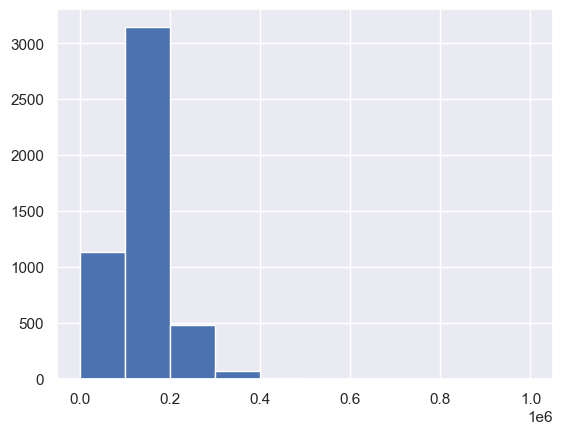

In [58]:
# 1. Histograma
bmw["km"].hist()

<Axes: xlabel='km', ylabel='Count'>

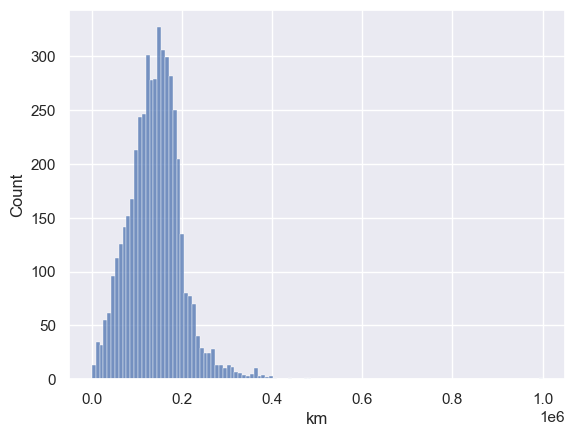

In [59]:
sns.histplot(data = bmw, x = 'km')

<Axes: xlabel='km'>

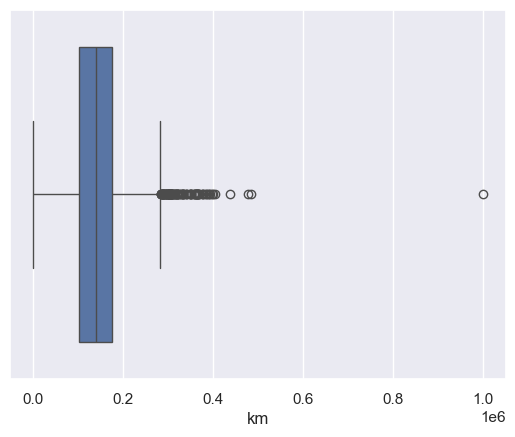

In [60]:
# 2. Diagrama de caja
# Tambien se puede poner asi: sns.boxplot(data = bmw, x = 'km')
sns.boxplot(x=bmw["km"])

In [61]:
# 3. Z-Score
z_scores_km = zscore(bmw['km'])
abs_z_scores_km = np.abs(z_scores_km)

# Select the outliers using a threshold of 3
outliers_km = bmw[abs_z_scores_km > 3]
outliers_km.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [62]:
# 4. Z-Score modificado
mad_score_km = median_abs_deviation(bmw['km'])

In [63]:
mad_score_km

nan

In [65]:
# 5. Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth_km = bmw['km'].quantile(0.75)
twenty_fifth_km = bmw['km'].quantile(0.25)

# Obtain IQR
iqr_km = seventy_fifth_km - twenty_fifth_km

# Upper and lower thresholds
upper_km = seventy_fifth_km + (1.5 * iqr_km)
lower_km = twenty_fifth_km - (1.5 * iqr_km)

# Subset the dataset
outliers2_km = bmw[(bmw['km'] < lower_km) | (bmw['km'] > upper_km)]
outliers2_km.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
56,BMW,320,329173.0,110.0,2004-07-01,diesel,silver,NaN,True,False,False,NaN,False,NaN,True,True,2300.0,2018-08-01
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,False,NaN,True,False,True,NaN,8200.0,2010-04-01
179,BMW,320,302525.0,100.0,NaN,diesel,grey,estate,False,NaN,False,NaN,False,False,True,False,1000.0,2018-09-01
262,BMW,318,319724.0,90.0,NaN,diesel,grey,estate,True,False,False,NaN,False,False,True,False,3000.0,2018-01-01
450,BMW,525,316855.0,150.0,2010-12-01,diesel,black,NaN,True,NaN,True,False,True,NaN,True,False,9400.0,2018-04-01


In [66]:
lower_km

-5615.5

In [67]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_km)}')

Number of outliers: 97


In [68]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw2 = bmw.copy()

In [69]:
# Calculate the median
median_value_km = bmw2['km'].median()

# Impute outliers with the median
bmw2.loc[outliers2_km.index, 'km'] = median_value_km

- potencia

In [70]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw["potencia"].describe()
# ¿El máximo es muy elevado con respecto a la media?

count    4842.000000
mean      128.981826
std        38.994839
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

<Axes: >

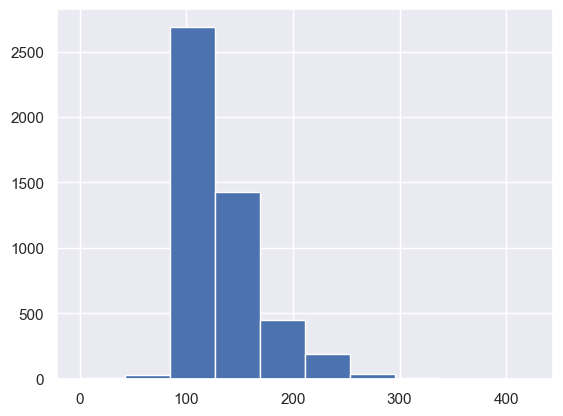

In [71]:
# 1. Histograma
bmw2["potencia"].hist()

<Axes: xlabel='potencia', ylabel='Count'>

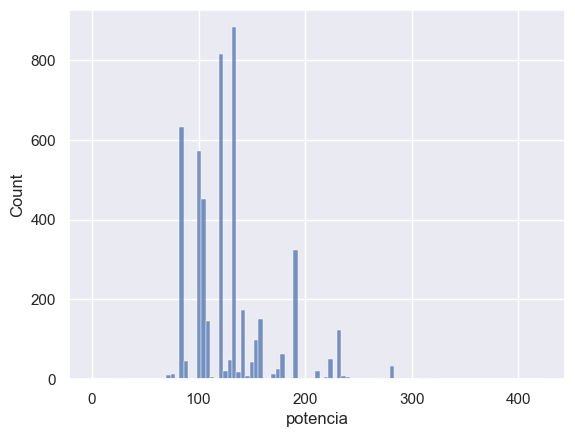

In [72]:
sns.histplot(data = bmw2, x = 'potencia')

<Axes: xlabel='potencia'>

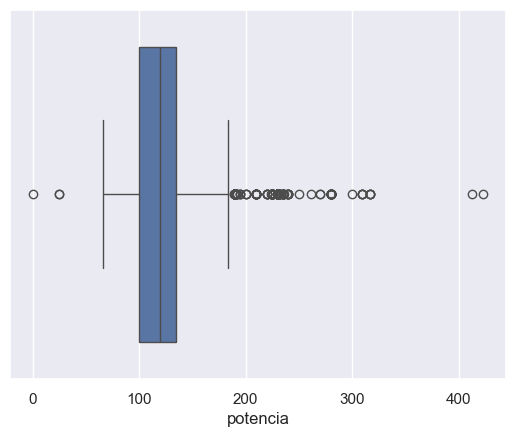

In [73]:
# 2. Diagrama de caja
sns.boxplot(x=bmw2["potencia"])

In [74]:
# 3. Z-Score
z_scores_potencia = zscore(bmw2['potencia'])
abs_z_scores_potencia = np.abs(z_scores_potencia)

# Select the outliers using a threshold of 3
outliers_potencia = bmw2[abs_z_scores_potencia > 3]
outliers_potencia.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [75]:
# 4. Z-Score modificado
mad_score_potencia = median_abs_deviation(bmw2['potencia'])

In [76]:
mad_score_potencia

nan

In [77]:
# 5. Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth_potencia = bmw2['potencia'].quantile(0.75)
twenty_fifth_potencia = bmw2['potencia'].quantile(0.25)

# Obtain IQR
iqr_potencia = seventy_fifth_potencia - twenty_fifth_potencia

# Upper and lower thresholds
upper_potencia = seventy_fifth_potencia + (1.5 * iqr_potencia)
lower_potencia = twenty_fifth_potencia - (1.5 * iqr_potencia)

# Subset the dataset
outliers2_potencia = bmw2[(bmw2['potencia'] < lower_potencia) | (bmw2['potencia'] > upper_potencia)]
outliers2_potencia.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
17,BMW,650,24521.0,270.0,NaN,petrol,grey,convertible,True,False,False,False,False,False,True,False,9200.0,2018-09-01
20,BMW,135,126213.0,225.0,2013-02-01,petrol,white,convertible,False,False,False,NaN,False,True,True,True,16800.0,2018-05-01
26,BMW,430,113678.0,190.0,NaN,diesel,black,NaN,True,True,False,False,True,NaN,True,NaN,30100.0,2018-05-01


In [78]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_potencia)}')

Number of outliers: 591


In [79]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw3 = bmw2.copy()

In [80]:
# Calculate the median
median_value_potencia = bmw3['potencia'].median()

# Impute outliers with the median
bmw3.loc[outliers2_potencia.index, 'potencia'] = median_value_potencia

- fecha_registro y fecha_venta (los cambio a datetime)

In [81]:
# Cambio la fecha_registro a formato datetime, y así más tarde poder restarla con fecha_venta
bmw3["fecha_registro"] = pd.to_datetime(bmw3["fecha_registro"])

In [82]:
# Cambio la fecha_venta a formato datetime

bmw3["fecha_venta"] = pd.to_datetime(bmw3["fecha_venta"])

In [81]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw3["fecha_registro"].describe()

count                             2420
mean     2012-12-06 07:35:12.396694016
min                1990-03-01 00:00:00
25%                2012-07-01 00:00:00
50%                2013-07-01 00:00:00
75%                2014-04-01 00:00:00
max                2017-11-01 00:00:00
Name: fecha_registro, dtype: object

<Axes: >

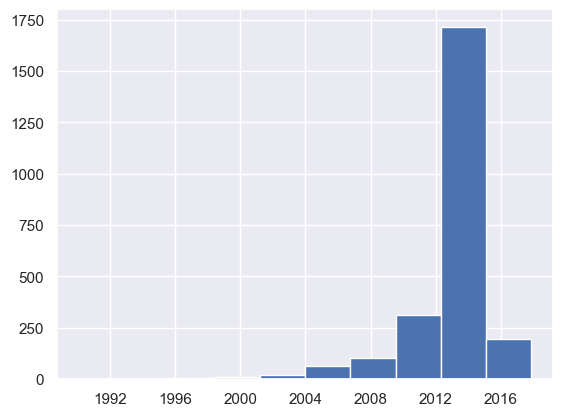

In [83]:
# 1. Histograma
bmw3["fecha_registro"].hist()

<Axes: xlabel='fecha_registro', ylabel='Count'>

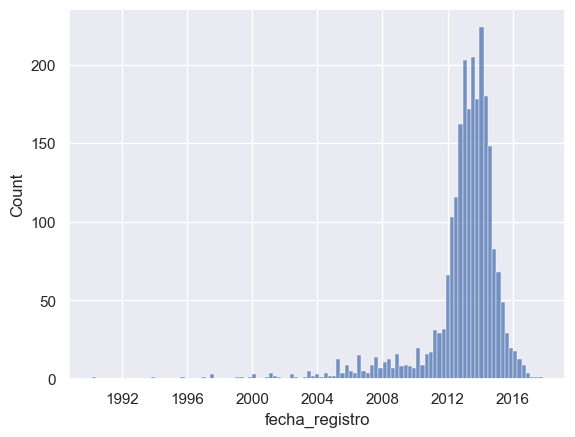

In [84]:
sns.histplot(data = bmw3, x = 'fecha_registro')

<Axes: xlabel='fecha_registro'>

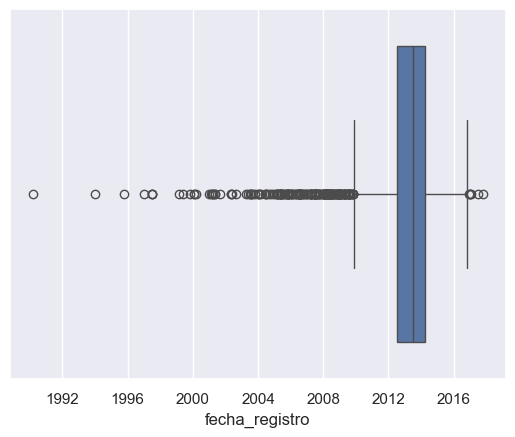

In [85]:
# 2. Diagrama de caja
sns.boxplot(x=bmw3["fecha_registro"])

In [86]:
# DECISION SOBRE OUTLIERS
# Decido mantenerlos. 

In [87]:
# Restamos ambas columnas para tener un numerico, tiempo de venta
bmw3["tiempo_venta"]=bmw3["fecha_venta"] - bmw3["fecha_registro"]

In [93]:
bmw3.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2161 days
1,BMW,M4,13929.0,120.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaT
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2132 days
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaT
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaT


- precio

In [92]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw3["precio"].describe()
# ¿El máximo es muy elevado con respecto a la media?

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: >

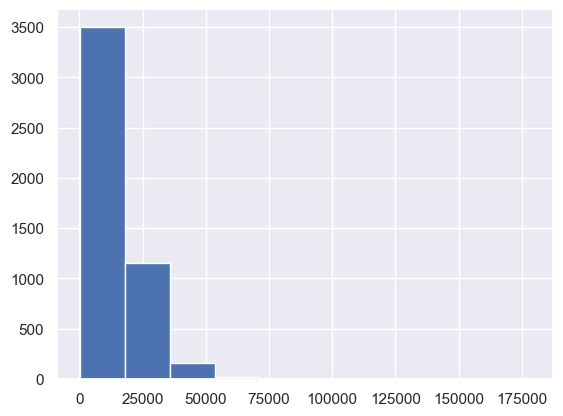

In [94]:
# 1. Histograma
bmw3["precio"].hist()

<Axes: xlabel='precio', ylabel='Count'>

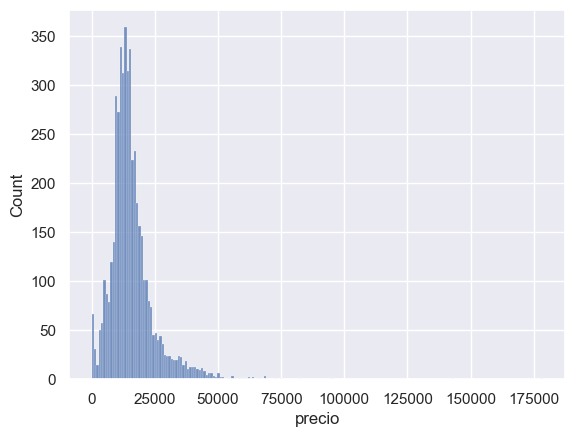

In [95]:
sns.histplot(data = bmw3, x = 'precio')

<Axes: xlabel='precio'>

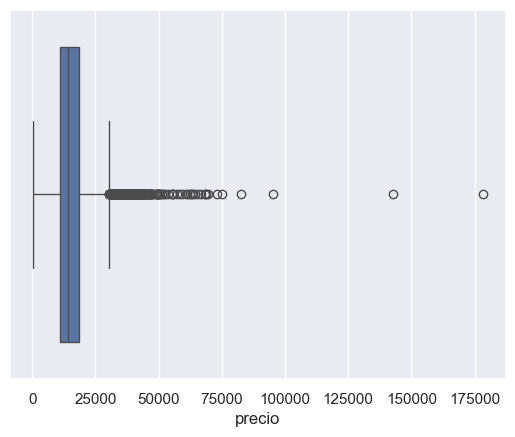

In [96]:
# 2. Diagrama de caja
sns.boxplot(x=bmw3["precio"])

In [97]:
# 3. Z-Score
z_scores_precio = zscore(bmw3['precio'])
abs_z_scores_precio = np.abs(z_scores_precio)

# Select the outliers using a threshold of 3
outliers_precio = bmw3[abs_z_scores_precio > 3]
outliers_precio.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta


In [98]:
# 4. Z-Score modificado
mad_score_precio = median_abs_deviation(bmw3['precio'])

In [99]:
mad_score_precio

nan

In [100]:
# 5. A partir de 75000€, decido cambiarlo por la mediana. 
# Menos de 2000€ decido cambiarlo por la mediana
outliers2_precio = bmw3[(bmw3["precio"]<= 2000) | (bmw3["precio"] > 75000)] 

In [101]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_precio)}')

Number of outliers: 102


In [102]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw4 = bmw3.copy()

In [103]:
# Calculate the median
median_value_precio = bmw4['precio'].median()

# Impute outliers with the median
bmw4.loc[outliers2_precio.index, 'precio'] = median_value_precio

<Axes: >

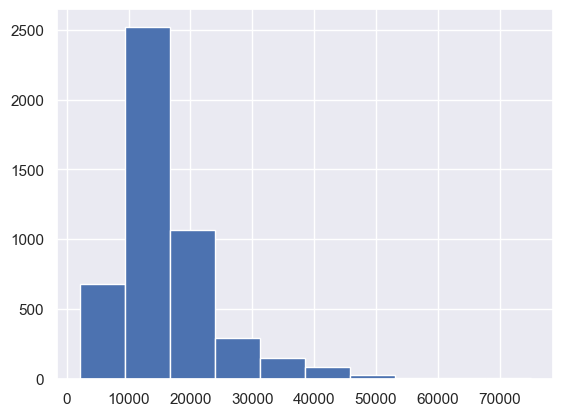

In [104]:
# Verificamos
bmw4["precio"].hist()

ANÁLISIS Y DECISIÓN SOBRE NULOS

In [105]:
bmw4.isnull().sum()
# Tenemos nulos en casi todas las columnas, salvo la columna gps

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
tiempo_venta                   2423
dtype: int64

In [106]:
bmw4["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

<Axes: >

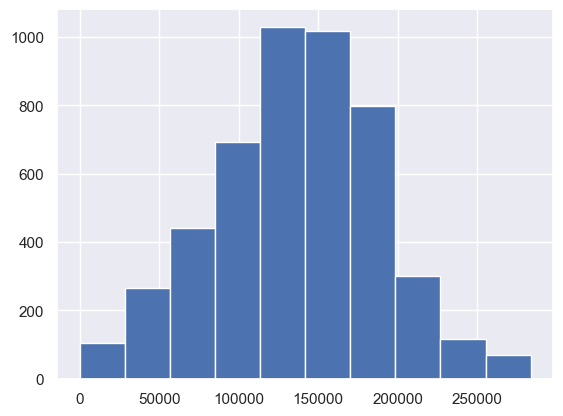

In [107]:
# Histograma de la columna km,  tiene ahora distribucion normal
bmw4["km"].hist()

<Axes: >

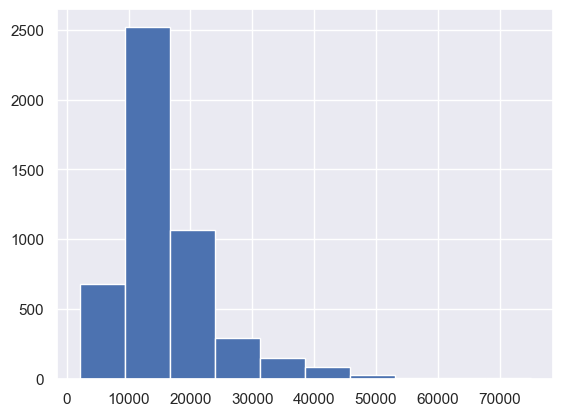

In [108]:
# Histograma de la columna precio,  tiene ahora una forma de distribución normal. 
bmw4["precio"].hist()

In [109]:
# No hay negativos en el precio, o igual a 0
bmw4[bmw4["precio"] <= 0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta


<Axes: >

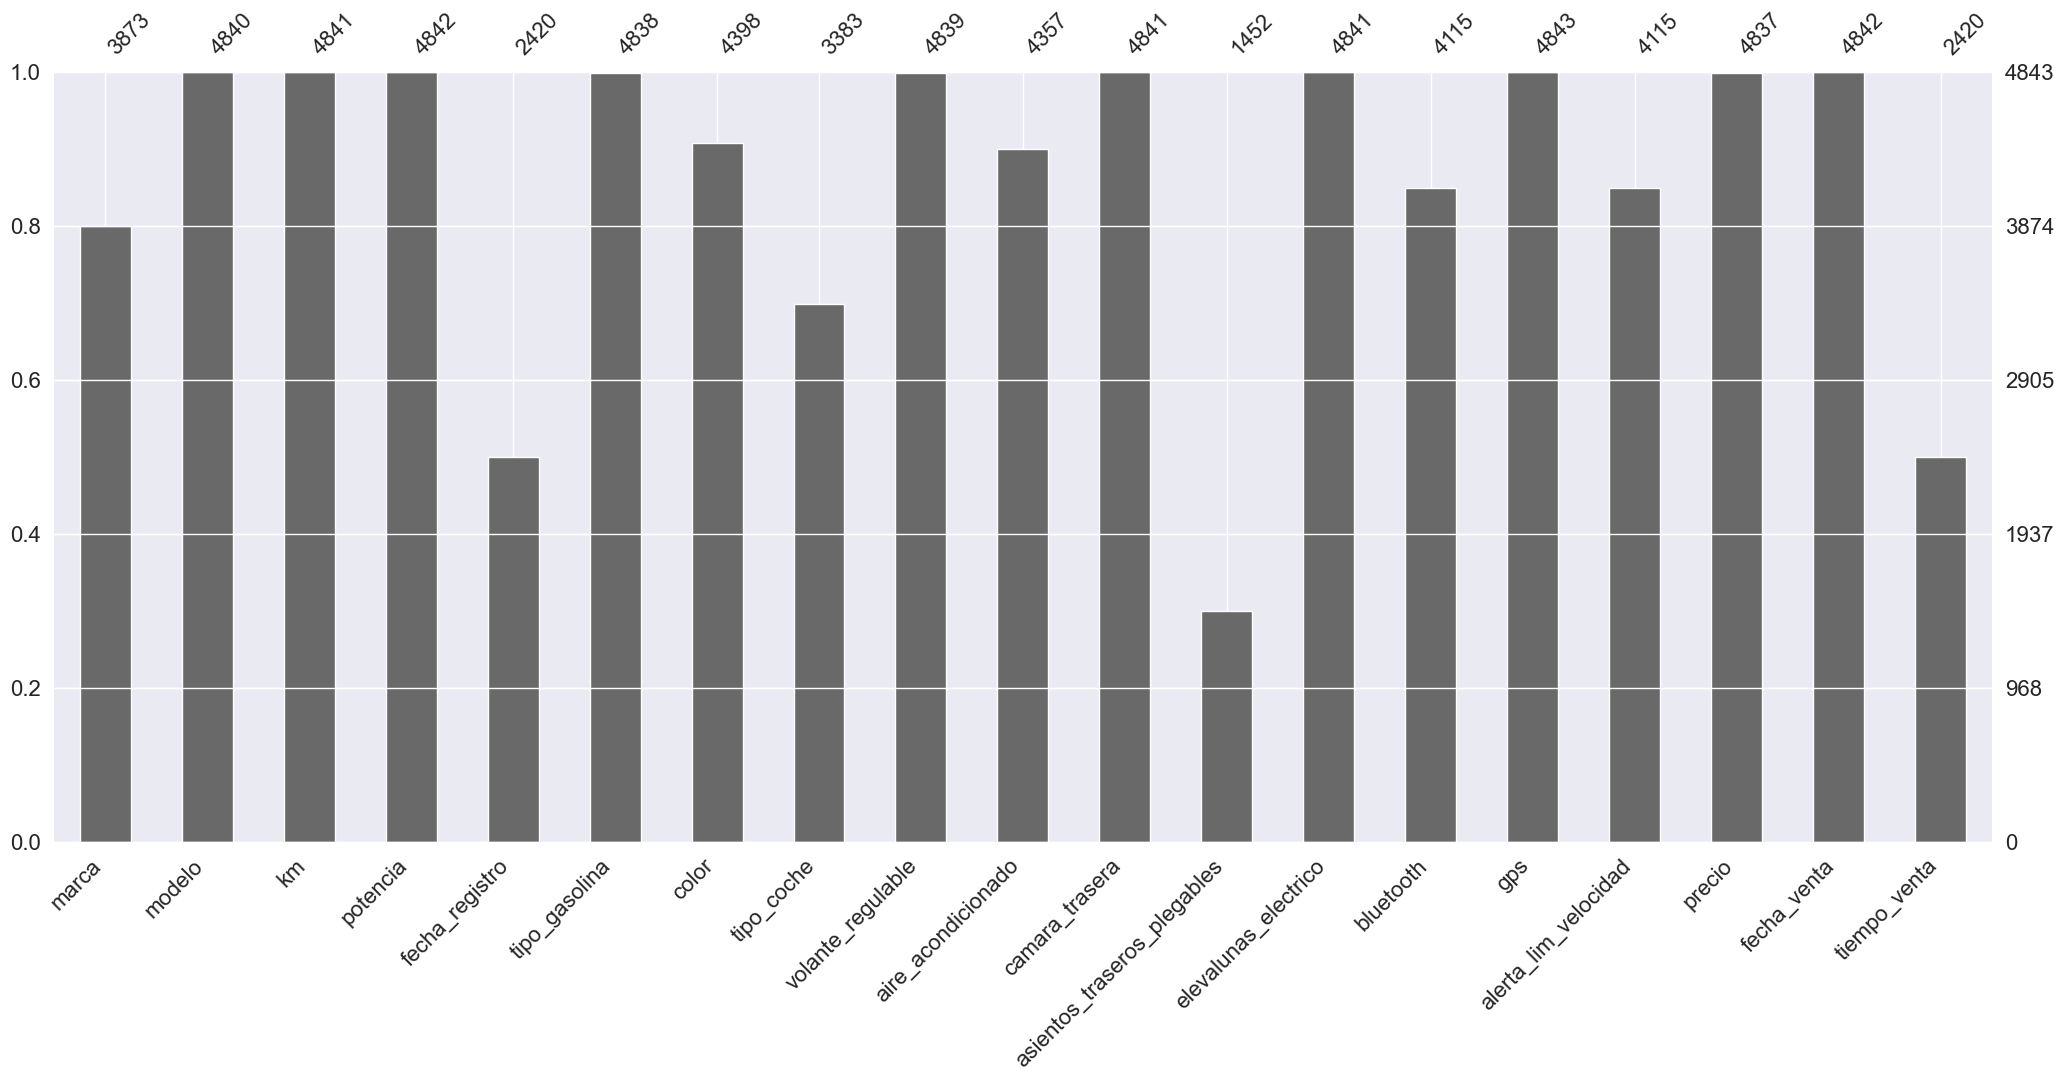

In [110]:
# Veamos la distribución de nulos en nuestro dataset con la librería missingno. Funcion bar
msno.bar (bmw4)

<Axes: >

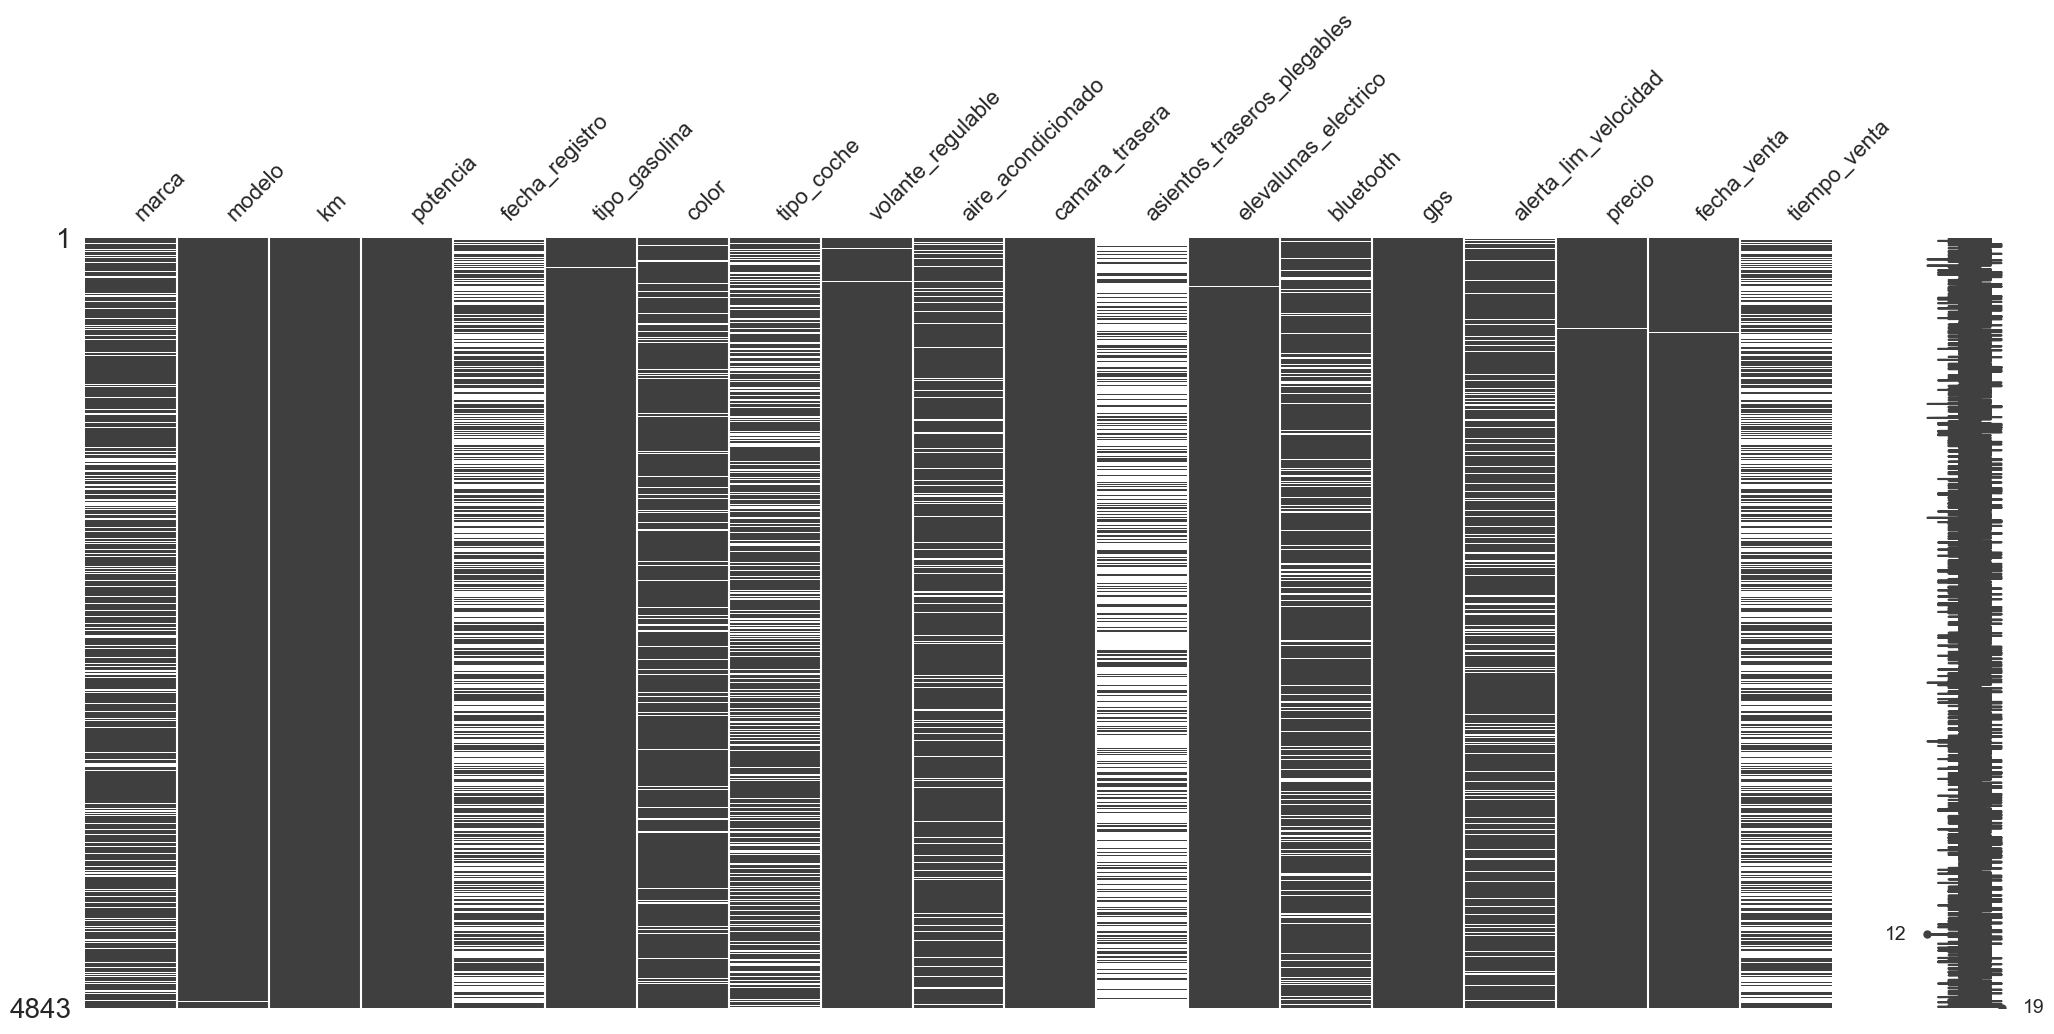

In [111]:
# Funcion matrix
msno.matrix (bmw4)

<Axes: >

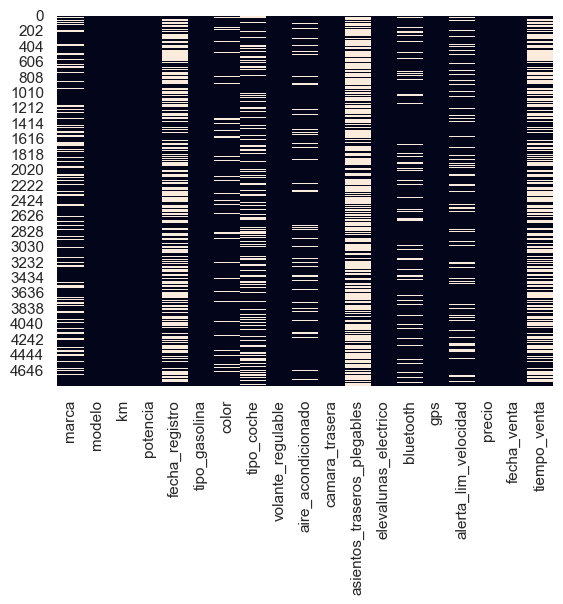

In [112]:
# Funcion heatmap
sns.heatmap(bmw4.isnull(), cbar=False)

<Axes: >

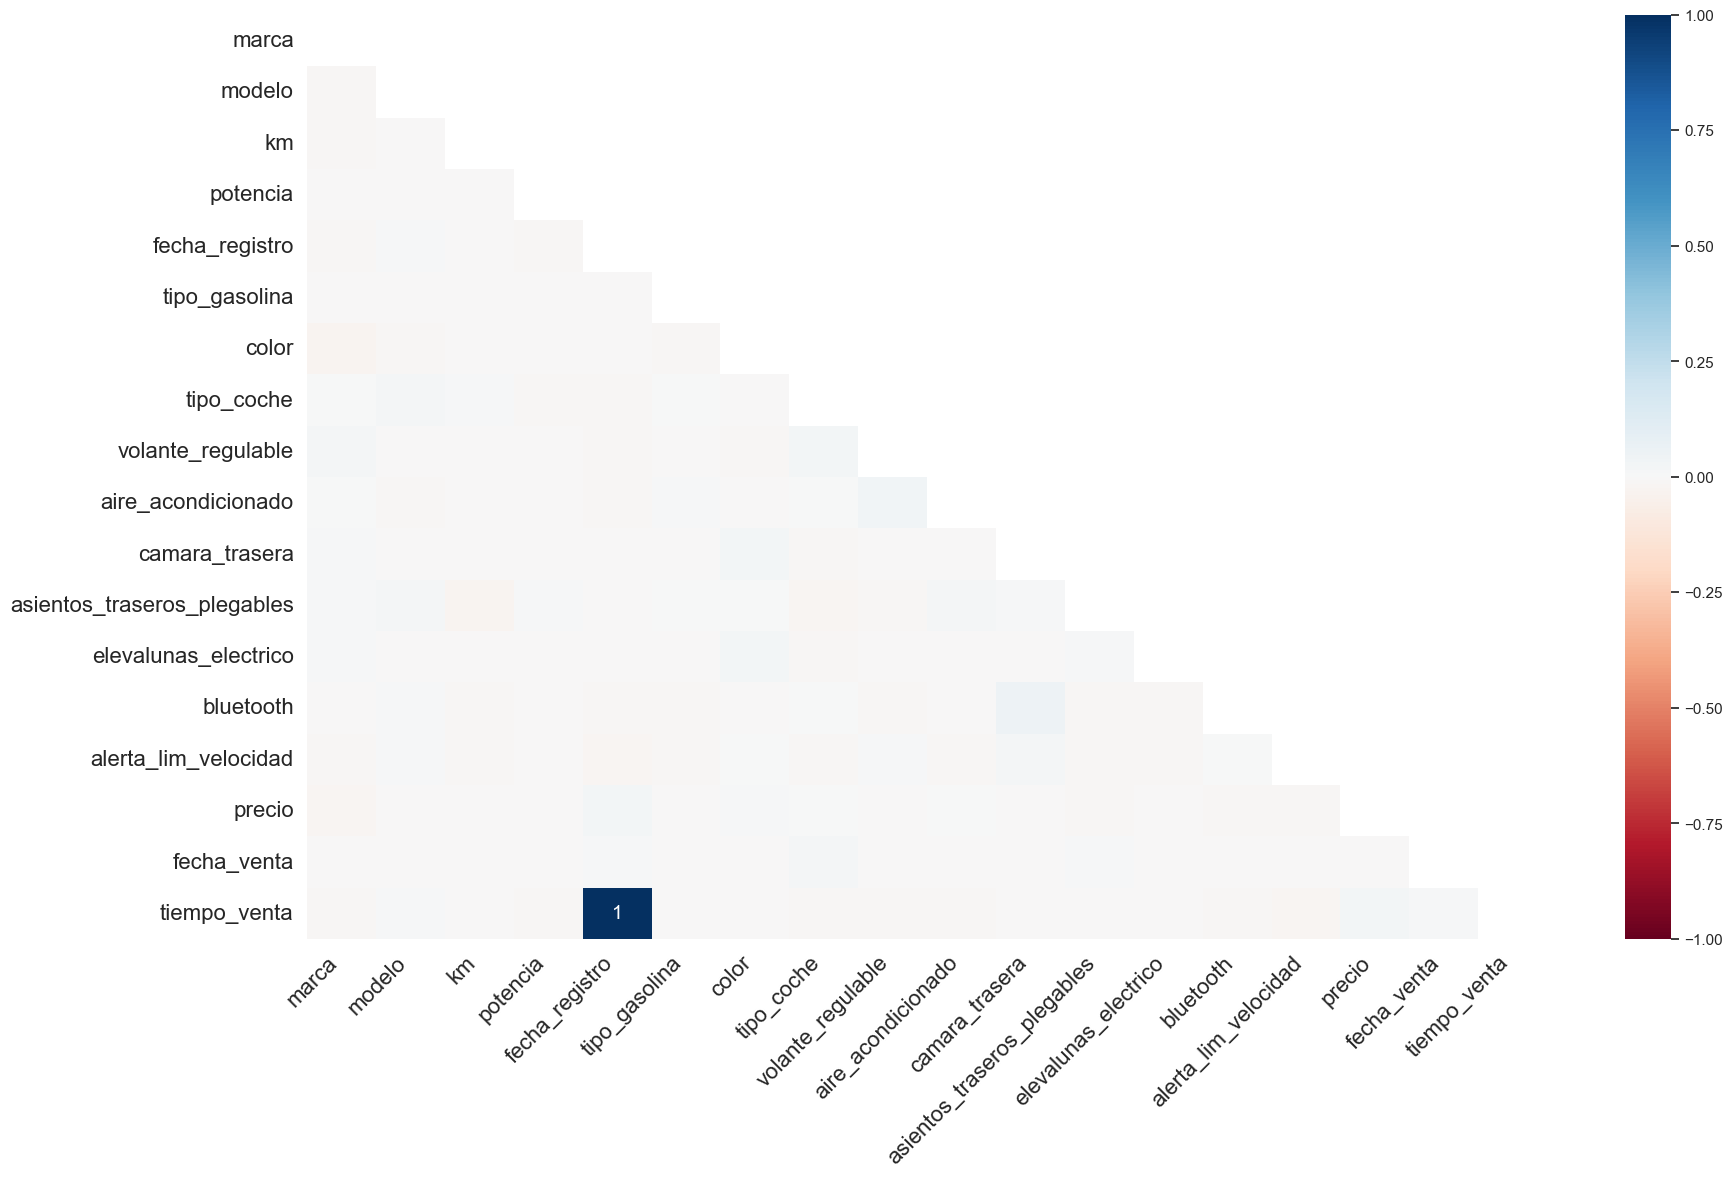

In [113]:
# Funcion heatmap
msno.heatmap(bmw4)

<Axes: >

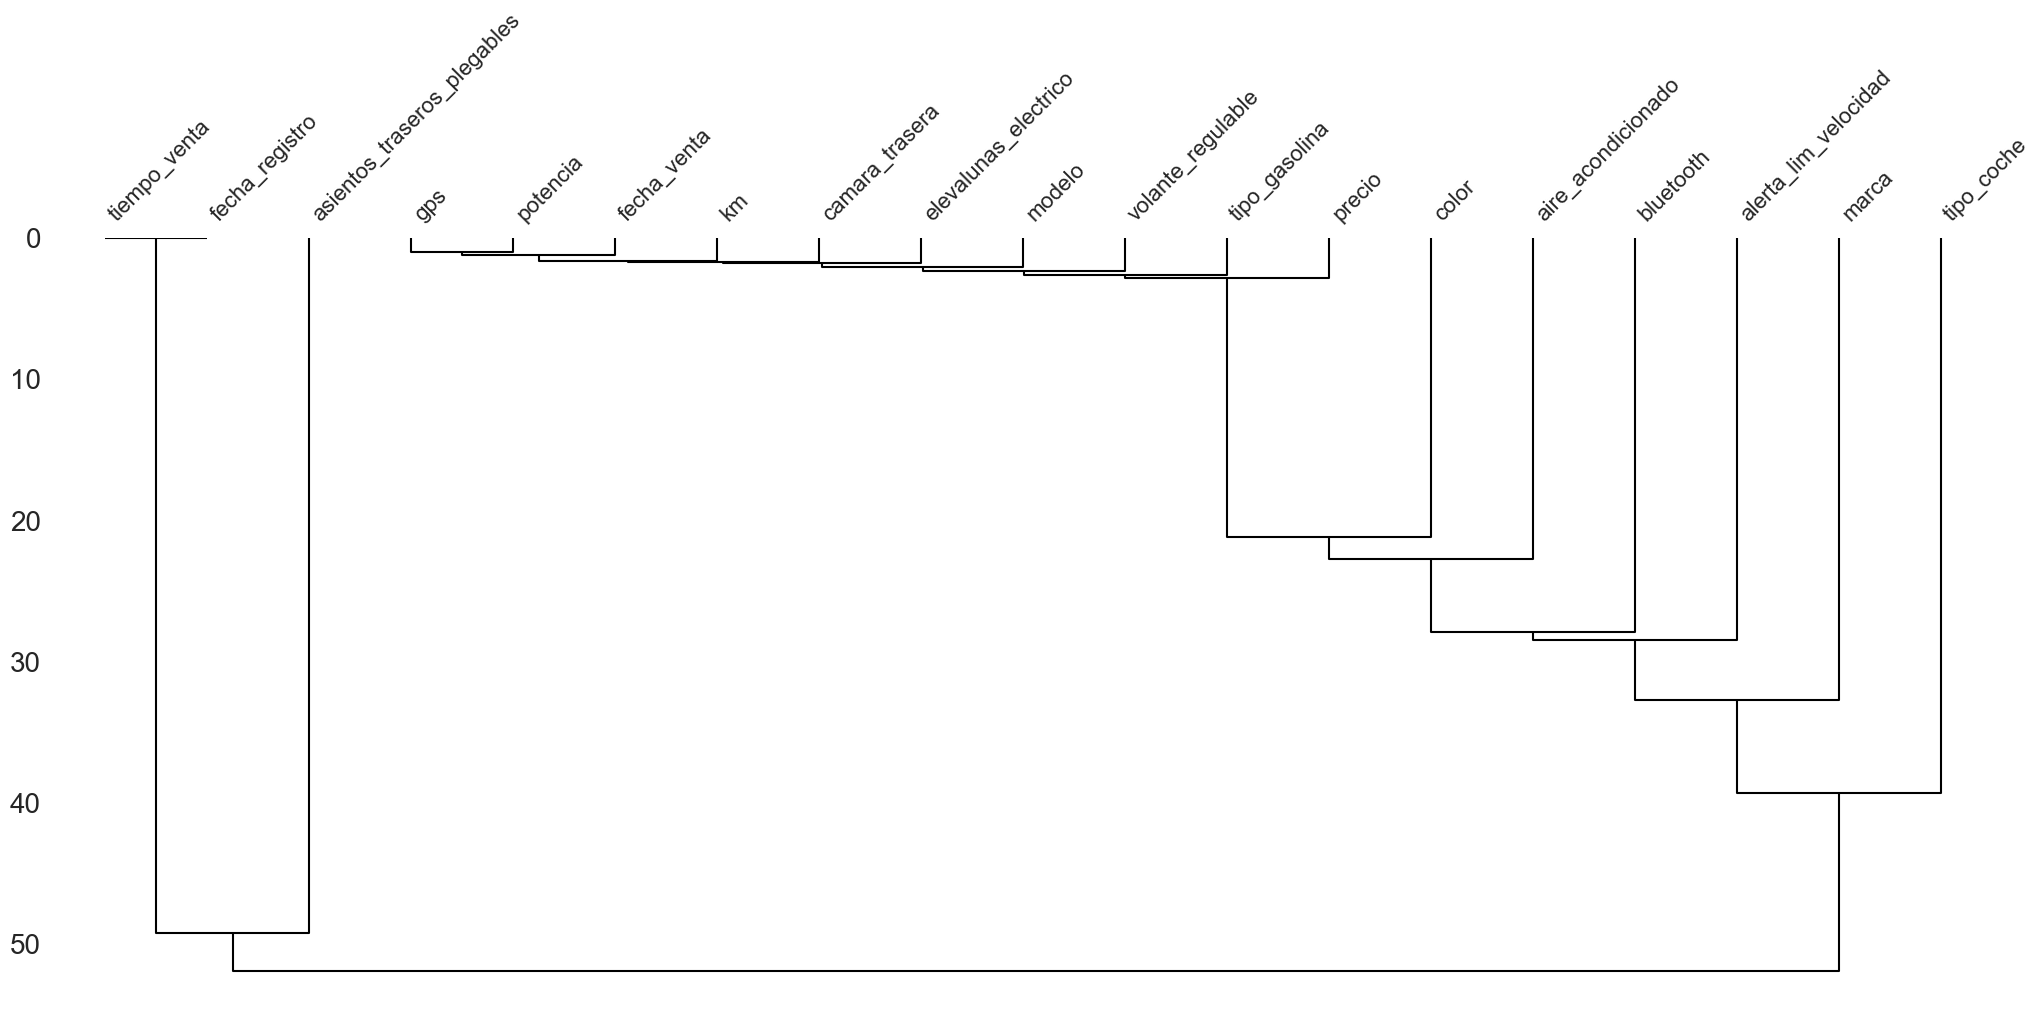

In [114]:
# Funcion dendrogram
msno.dendrogram (bmw4)

In [115]:
bmw5 = bmw4.copy()

In [116]:
# Los nulos en:
# - Marca: no tenemos claro que sean de la marca BMW, se podrían cambiar a "BMW"
# - Modelo: hay 3 nulos en Modelo, que se podrían eliminar - NULOS ELIMINAR
# - km: se podría hacer una mediana
# - potencia: se podría hacer una mediana
# - tipo_gasolina: Cambiar a "sin_tipo_gasolina"
# - color: Cambiar a "sin_color"
# - tipo_coche: Cambiar a "sin_tipo_coche"
# - volante_regulable: se podrían eliminar - NULOS ELIMINAR
# - aire_acondicionado: se podrían cambiar a -1 
# - camara_trasera: se podrían eliminar - NULOS ELIMINAR
# - asientos_traseros_plegables: Demasiados nulos, más del 50%, decido ELIMINAR COLUMNA 
# - elevalunas_electrico: se podrían eliminar - NULOS ELIMINAR
# - bluetooth: se podrían cambiar a -1 
# - alerta_lim_velocidad: se podrían cambiar a -1 

# - tiempo de venta, los nulos los cambiamos a mediana

# - precio: los he cambiado por el valor de la mediana


- Marca:

In [117]:
# Calculando porcentaje de nulos de marca
(bmw5["marca"].isnull().sum()/bmw5.shape[0])*100

20.028907701837703

In [118]:
# Presuponemos que son todos coches BMW, Cambio los nulos a "BMW"
bmw5["marca"].fillna("BMW", inplace=True)

In [119]:
# Verificación
bmw5["marca"].isnull().sum()

0

In [120]:
# Verificación
bmw5["marca"].value_counts()

marca
BMW    4843
Name: count, dtype: int64

- Modelo

In [121]:
# Calculando porcentaje de nulos de modelo
(bmw5["modelo"].isnull().sum()/bmw5.shape[0])*100

0.06194507536650836

In [122]:
# Quiero saber el total de nulos de la columna modelo
bmw5["modelo"].isnull().sum()

3

In [123]:
# Decido eliminar estas 3 filas
bmw5.dropna(subset=["modelo"], inplace=True)

In [124]:
# Verificación
bmw5["modelo"].isnull().sum()

0

 - km

In [125]:
# Calculando porcentaje de nulos de km
(bmw5["km"].isnull().sum()/bmw5.shape[0])*100

0.04132231404958678

In [126]:
# Quiero saber el total de nulos de la columna km
bmw5["km"].isnull().sum()

2

In [127]:
bmw5["km"].describe()

count      4838.000000
mean     136990.029351
std       51927.416234
min         -64.000000
25%      102863.000000
50%      141080.000000
75%      172202.500000
max      283612.000000
Name: km, dtype: float64

In [128]:
# Decido poner en los dos nulos el valor de la mediana de km
bmw5["km"].fillna(bmw5["km"].median(), inplace=True)

In [129]:
# Verificación
bmw5["km"].isnull().sum()

0

- potencia

In [130]:
# Calculando porcentaje de nulos de potencia
(bmw5["potencia"].isnull().sum()/bmw5.shape[0])*100

0.02066115702479339

In [131]:
# Quiero saber el total de nulos de la columna potencia
bmw5["potencia"].isnull().sum()

1

In [132]:
bmw5["potencia"].describe()

count    4839.000000
mean      117.943377
std        21.468679
min        66.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       183.000000
Name: potencia, dtype: float64

In [133]:
# Decido poner en el nulo el valor de la mediana de potencia
bmw5["potencia"].fillna(bmw5["potencia"].median(), inplace=True)

In [134]:
# Verificación
bmw5["potencia"].isnull().sum()

0

tiempo_venta

In [135]:
bmw5.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01,2161 days
1,BMW,M4,13929.0,120.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01,NaT
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01,2132 days
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01,NaT
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01,NaT


In [136]:
# eliminamos columnas de fechas
del bmw5["fecha_registro"]

In [137]:
del bmw5["fecha_venta"]

In [138]:
bmw5.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2161 days
1,BMW,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,NaT
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2132 days
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,NaT
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,NaT


In [140]:
# Calculando porcentaje de nulos de tiempo_venta
(bmw5["tiempo_venta"].isnull().sum()/bmw5.shape[0])*100

50.02066115702479

In [141]:
# Cambio los nulos a su mediana
bmw5["tiempo_venta"].fillna(bmw5["tiempo_venta"].median(), inplace=True)

In [142]:
# Verificación
bmw5["tiempo_venta"].isnull().sum()

0

- tipo_gasolina

In [143]:
# Calculando porcentaje de nulos de tipo_gasolina
(bmw5["tipo_gasolina"].isnull().sum()/bmw5.shape[0])*100

0.10330578512396695

In [144]:
# Cambio los nulos a "sin_tipo_gasolina"
bmw5["tipo_gasolina"].fillna("sin_tipo_gasolina", inplace=True)

In [145]:
# Verificación
bmw5["tipo_gasolina"].isnull().sum()

0

- color

In [146]:
# Calculando porcentaje de nulos de color
(bmw5["color"].isnull().sum()/bmw5.shape[0])*100

9.194214876033058

In [147]:
# Cambio los nulos a "sin_color"
bmw5["color"].fillna("sin_color", inplace=True)

In [148]:
# Verificación
bmw5["color"].isnull().sum()

0

- tipo_coche

In [149]:
# Calculando porcentaje de nulos de tipo_coche
(bmw5["tipo_coche"].isnull().sum()/bmw5.shape[0])*100

30.123966942148762

In [150]:
# Cambio los nulos a "sin_tipo_coche"
bmw5["tipo_coche"].fillna("sin_tipo_coche", inplace=True)

In [151]:
# Verificación
bmw5["tipo_coche"].isnull().sum()

0

- volante_regulable

In [152]:
# Calculando porcentaje de nulos de volante_regulable
(bmw5["volante_regulable"].isnull().sum()/bmw5.shape[0])*100

0.08264462809917356

In [153]:
# Quiero saber el total de nulos de volante_regulable
bmw5["volante_regulable"].isnull().sum()

4

In [154]:
# Decido eliminar estas 4 filas
bmw5.dropna(subset=["volante_regulable"], inplace=True)

In [155]:
# Verificación
bmw5["volante_regulable"].isnull().sum()

0

- aire_acondicionado

In [156]:
# Calculando porcentaje de nulos de aire_acondicionado
(bmw5["aire_acondicionado"].isnull().sum()/bmw5.shape[0])*100

10.008271298593879

In [157]:
# Quiero saber el total de nulos de aire_acondicionado
bmw5["aire_acondicionado"].isnull().sum()

484

In [158]:
# Cambio los nulos a "-1"
bmw5["aire_acondicionado"].fillna(-1, inplace=True)

In [159]:
# Verificación
bmw5["aire_acondicionado"].isnull().sum()

0

- camara_trasera

In [160]:
# Calculando porcentaje de nulos de aire_acondicionado
(bmw5["camara_trasera"].isnull().sum()/bmw5.shape[0])*100

0.0413564929693962

In [161]:
# Quiero saber el total de nulos de camara_trasera
bmw5["camara_trasera"].isnull().sum()

2

In [162]:
# Decido eliminar estas 2 filas
bmw5.dropna(subset=["camara_trasera"], inplace=True)

In [163]:
# Verificación
bmw5["camara_trasera"].isnull().sum()

0

- asientos_traseros_plegables


In [164]:
# Calculando porcentaje de nulos de asientos_traseros_plegables
(bmw5["asientos_traseros_plegables"].isnull().sum()/bmw5.shape[0])*100

70.00413736036408

In [165]:
# El porcentaje de nulos es muy alto, decido eliminar la columna entera
del(bmw5["asientos_traseros_plegables"])

- elevalunas_electrico

In [166]:
# Calculando porcentaje de nulos de elevalunas_electrico
(bmw5["elevalunas_electrico"].isnull().sum()/bmw5.shape[0])*100

0.04137360364087712

In [167]:
# Quiero saber el total de nulos de camara_trasera
bmw5["elevalunas_electrico"].isnull().sum()

2

In [168]:
# Decido eliminar estas 2 filas
bmw5.dropna(subset=["elevalunas_electrico"], inplace=True)

In [169]:
# Verificación
bmw5["elevalunas_electrico"].isnull().sum()

0

- bluetooth

In [170]:
# Calculando porcentaje de nulos de bluetooth
(bmw5["bluetooth"].isnull().sum()/bmw5.shape[0])*100

15.004139072847684

In [171]:
# Quiero saber el total de nulos de bluetooth
bmw5["bluetooth"].isnull().sum()

725

In [172]:
# Cambio los nulos a "-1"
bmw5["bluetooth"].fillna(-1, inplace=True)

In [173]:
# Verificación
bmw5["bluetooth"].isnull().sum()

0

- alerta_lim_velocidad


In [174]:
# Calculando porcentaje de nulos de alerta_lim_velocidad
(bmw5["alerta_lim_velocidad"].isnull().sum()/bmw5.shape[0])*100

15.004139072847684

In [175]:
# Quiero saber el total de nulos de bluetooth
bmw5["alerta_lim_velocidad"].isnull().sum()

725

In [177]:
# Cambio los nulos a "-1"
bmw5["alerta_lim_velocidad"].fillna(-1, inplace=True)

In [176]:
# Verificación
bmw5["alerta_lim_velocidad"].isnull().sum()

0

- precio

In [178]:
# Calculando porcentaje de nulos de fecha_venta
(bmw5["precio"].isnull().sum()/bmw5.shape[0])*100

0.12417218543046359

In [179]:
# Quiero saber el total de nulos de precio
bmw5["precio"].isnull().sum()

6

In [180]:
bmw5["precio"].describe()

count     4826.000000
mean     16010.277663
std       8338.978084
min       2100.000000
25%      11100.000000
50%      14200.000000
75%      18600.000000
max      75000.000000
Name: precio, dtype: float64

<Axes: >

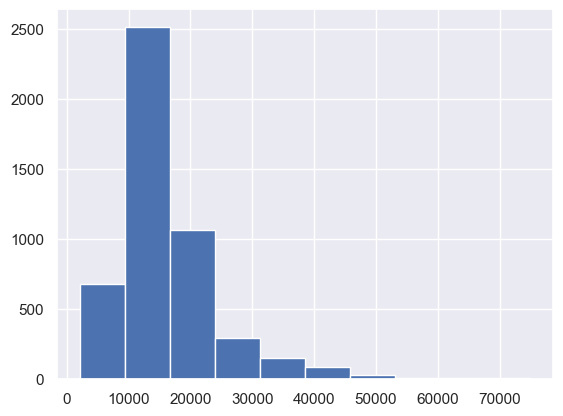

In [181]:
# Cuando cambie el valor de los nulos, tener en cuenta que la mediana se pone cuando hay mucha diversificacion de los datos
bmw5["precio"].hist()

In [187]:
# Decido cambiar los nulos por el valor de la mediana del precio. 
# Tengo dudas de si es buena idea imputar a los nulos por un valor, cuando se trata del target. Igual es mejor eliminar nulos, sin cambiar su valor. 
bmw5["precio"].fillna(bmw5["precio"].median(), inplace=True)

In [188]:
# Verificación
bmw5["precio"].isnull().sum()

0

ELIMINAR COLUMNAS

In [189]:
# Hacemos una copia
bmw6=bmw5.copy()

In [190]:
# Ya hemos eliminado una columna "asientos_traseros_plegables"

In [191]:
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   marca                 4832 non-null   object         
 1   modelo                4832 non-null   object         
 2   km                    4832 non-null   float64        
 3   potencia              4832 non-null   float64        
 4   tipo_gasolina         4832 non-null   object         
 5   color                 4832 non-null   object         
 6   tipo_coche            4832 non-null   object         
 7   volante_regulable     4832 non-null   object         
 8   aire_acondicionado    4832 non-null   object         
 9   camara_trasera        4832 non-null   object         
 10  elevalunas_electrico  4832 non-null   object         
 11  bluetooth             4832 non-null   object         
 12  gps                   4832 non-null   bool           
 13  alerta_l

In [192]:
# Decido eliminar la columna de marca, ya que son todos "BMW"
del(bmw6["marca"])

In [193]:
# Verificamos
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   km                    4832 non-null   float64        
 2   potencia              4832 non-null   float64        
 3   tipo_gasolina         4832 non-null   object         
 4   color                 4832 non-null   object         
 5   tipo_coche            4832 non-null   object         
 6   volante_regulable     4832 non-null   object         
 7   aire_acondicionado    4832 non-null   object         
 8   camara_trasera        4832 non-null   object         
 9   elevalunas_electrico  4832 non-null   object         
 10  bluetooth             4832 non-null   object         
 11  gps                   4832 non-null   bool           
 12  alerta_lim_velocidad  4832 non-null   object         
 13  precio  

AGRUPAR COLUMANS

In [194]:
# Analizo
bmw6.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta
0,118,140411.0,100.0,diesel,black,sin_tipo_coche,True,True,False,True,-1,True,-1,11300.0,2161 days
1,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,1767 days
2,320,183297.0,120.0,diesel,white,sin_tipo_coche,False,False,False,True,False,True,False,10200.0,2132 days
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,-1,25100.0,1767 days
4,425,97097.0,160.0,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,True,33400.0,1767 days


In [195]:
# Hay algo que vea que se deba agrupar? ¿Podria agrupar marca y modelo?
# Decidimos no agrupar ninguna columna

CORRELACION INTERMADIA: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO

In [196]:
# Análisis de Correlación intermedia, hay alguna variable correlacionada?

In [197]:
# Hacemos una copia
bmw7=bmw6.copy()

In [198]:
# Hacemos una correlación para detectar si hay variables que explican lo mismo (lo va a hacer solamente con numericos)
corr = bmw7.corr(numeric_only=True)

In [199]:
# o se observa una correlación directa inicial entre los diferentes campos
# hay poca relacion entre precio y km, o precio y gps.
# Hay un poco de relacion entre potencia y precio
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,gps,precio
km,1.000000,0.052635,0.164165,-0.402606
potencia,0.052635,1.000000,-0.056632,0.327955
gps,0.164165,-0.056632,1.000000,-0.009090
precio,-0.402606,0.327955,-0.009090,1.000000


In [202]:
# Hacemos una copia
bmw8=bmw7.copy()

In [203]:
# verificamos
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   km                    4832 non-null   float64        
 2   potencia              4832 non-null   float64        
 3   tipo_gasolina         4832 non-null   object         
 4   color                 4832 non-null   object         
 5   tipo_coche            4832 non-null   object         
 6   volante_regulable     4832 non-null   object         
 7   aire_acondicionado    4832 non-null   object         
 8   camara_trasera        4832 non-null   object         
 9   elevalunas_electrico  4832 non-null   object         
 10  bluetooth             4832 non-null   object         
 11  gps                   4832 non-null   bool           
 12  alerta_lim_velocidad  4832 non-null   object         
 13  precio  

In [ ]:
# lnum = ["km", "potencia"]
# lbool = []
# lcat = []

- gps

In [310]:
# Convertimos la columna gps (booleana) a gps_int con numerico entero. Si tiene gps le pondremos 1, si no, 0. Utilizamos tecnica np.where. 
bmw8["gps_int"]= np.where(bmw8["gps"]== True,1,0)

In [203]:
# Eliminamos columna gps 
del(bmw8["gps"])

In [204]:
# Verificamos 
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   tipo_gasolina         4832 non-null   object         
 2   color                 4832 non-null   object         
 3   tipo_coche            4832 non-null   object         
 4   volante_regulable     4832 non-null   object         
 5   aire_acondicionado    4832 non-null   object         
 6   camara_trasera        4832 non-null   object         
 7   elevalunas_electrico  4832 non-null   object         
 8   bluetooth             4832 non-null   object         
 9   alerta_lim_velocidad  4832 non-null   object         
 10  precio                4832 non-null   float64        
 11  tiempo_venta          4832 non-null   timedelta64[ns]
 12  km_int                4832 non-null   int32          
 13  potencia

In [205]:
# Verificamos 
bmw8["gps_int"].value_counts()

gps_int
1    4504
0     328
Name: count, dtype: int64

In [206]:
# Verificamos 
bmw7["gps"].value_counts()

gps
True     4504
False     328
Name: count, dtype: int64

In [207]:
# Verificamos 
bmw8.head()

,modelo,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,tiempo_venta,km_int,potencia_int,gps_int
0,118,diesel,black,sin_tipo_coche,True,True,False,True,-1,-1,11300.0,2161 days,140411,100,1
1,M4,petrol,grey,convertible,True,True,False,False,True,True,69700.0,1767 days,13929,120,1
2,320,diesel,white,sin_tipo_coche,False,False,False,True,False,False,10200.0,2132 days,183297,120,1
3,420,diesel,red,convertible,True,True,False,True,True,-1,25100.0,1767 days,128035,135,1
4,425,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,33400.0,1767 days,97097,160,1


In [208]:
# Verificamos 
bmw8["gps_int"].value_counts()

gps_int
1    4504
0     328
Name: count, dtype: int64

In [209]:
# Verificamos 
bmw7["gps"].value_counts()

gps
True     4504
False     328
Name: count, dtype: int64

SEPARAMOS NUESTRAS VARIABLES EN TARGET, NUMERICAS, BOOLEANAS Y CATEGORICAS

In [311]:
bmw9=bmw8.copy()

In [312]:
bmw9.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo_venta,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,gps_int
0,118,140411.0,100.0,diesel,black,sin_tipo_coche,True,True,False,True,-1,True,-1,11300.0,2161 days,1,0,1,1,1
1,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,1767 days,1,0,0,1,1
2,320,183297.0,120.0,diesel,white,sin_tipo_coche,False,False,False,True,False,True,False,10200.0,2132 days,0,0,1,0,1
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,-1,25100.0,1767 days,1,0,1,1,1
4,425,97097.0,160.0,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,True,33400.0,1767 days,1,0,0,1,1


In [298]:
bmw9["volante_regulable_bool"]=np.where(bmw9["volante_regulable"]==True,1,0 )

In [304]:
bmw9["aire_acondicionado_bool"]=np.where(bmw9["aire_acondicionado"]==True,1,0 )

In [300]:
bmw9["camara_trasera_bool"]=np.where(bmw9["camara_trasera"]==True,1,0)

In [303]:
bmw9["elevalunas_electrico_bool"]=np.where(bmw9["elevalunas_electrico"]==True,1,0)

In [313]:
bmw9["gps_int_bool"]=np.where(bmw9["gps_int"]==True,1,0)

In [314]:
bmw9["bluetooth_bool"]=np.where(bmw9["bluetooth"]==True,1,0)

In [316]:
bmw9["alerta_lim_velocidad_bool"]=np.where(bmw9["alerta_lim_velocidad"]==True,1,0)

In [317]:
bmw9.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,precio,tiempo_venta,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,gps_int,gps_int_bool,bluetooth_bool,alerta_lim_velocidad_bool
0,118,140411.0,100.0,diesel,black,sin_tipo_coche,True,True,False,True,...,11300.0,2161 days,1,0,1,1,1,1,0,0
1,M4,13929.0,120.0,petrol,grey,convertible,True,True,False,False,...,69700.0,1767 days,1,0,0,1,1,1,1,1
2,320,183297.0,120.0,diesel,white,sin_tipo_coche,False,False,False,True,...,10200.0,2132 days,0,0,1,0,1,1,0,0
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,...,25100.0,1767 days,1,0,1,1,1,1,1,0
4,425,97097.0,160.0,diesel,silver,sin_tipo_coche,True,True,False,False,...,33400.0,1767 days,1,0,0,1,1,1,1,1


In [210]:

target=["precio"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]

  for i in dataset:
    if((dataset[i].dtype.kind=="i") or (dataset[i].dtype.kind=="f")) and i not in target and len(dataset[i].unique())!=2:
      lista_numericas.append(i)
    elif(dataset[i].dtype.kind=="i") and i not in target and len(dataset[i].unique())==2:
      lista_boolean.append(i)
    elif(dataset[i].dtype.kind=="O") and i not in target:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [211]:
lnum, lbool, lcat = obtener_lista_variables(bmw8)

In [212]:
lnum

['km_int', 'potencia_int']

In [213]:
lbool

['gps_int']

In [214]:
lcat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

Lógica de las variables

[[<Axes: title={'center': 'km_int'}>]]
[[<Axes: title={'center': 'potencia_int'}>]]


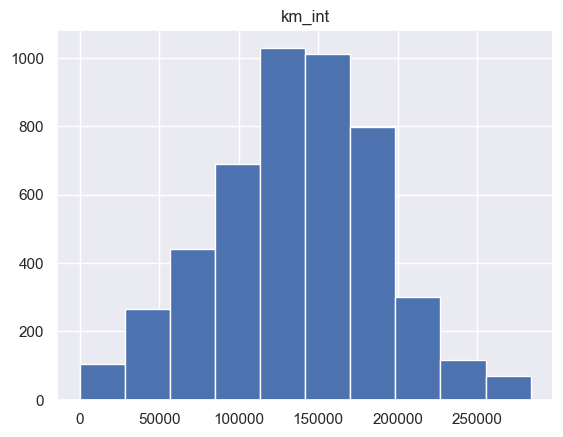

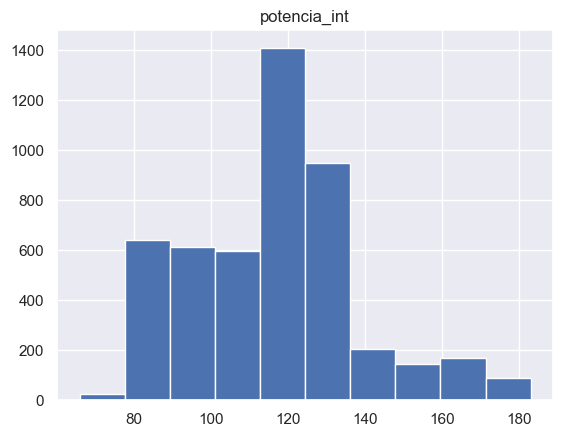

In [215]:
for i in lnum:
  print(bmw8.hist(i))

[[<Axes: title={'center': 'km_int'}>]]
[[<Axes: title={'center': 'potencia_int'}>]]


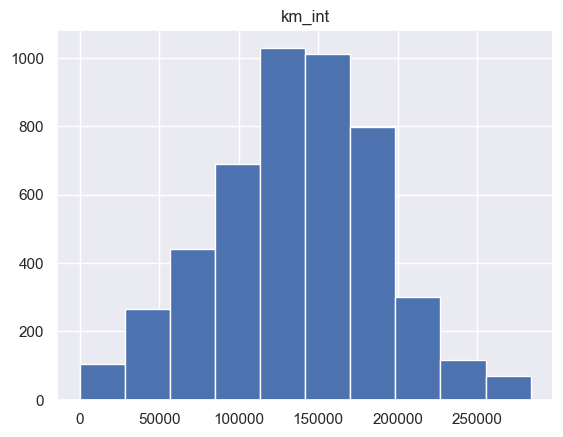

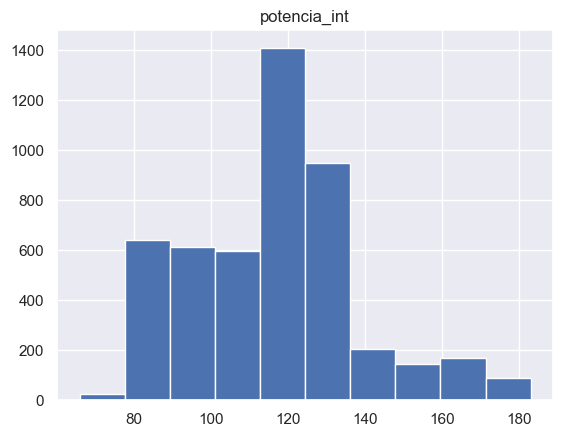

In [216]:
for i in lnum:
  print(bmw8.hist(i))

[[<Axes: title={'center': 'km_int'}>
  <Axes: title={'center': 'potencia_int'}>]]


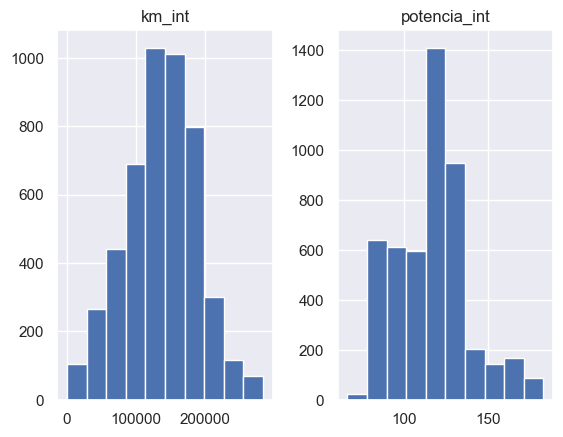

In [217]:
print(bmw8.hist(lnum))

[[<Axes: title={'center': 'gps_int'}>]]


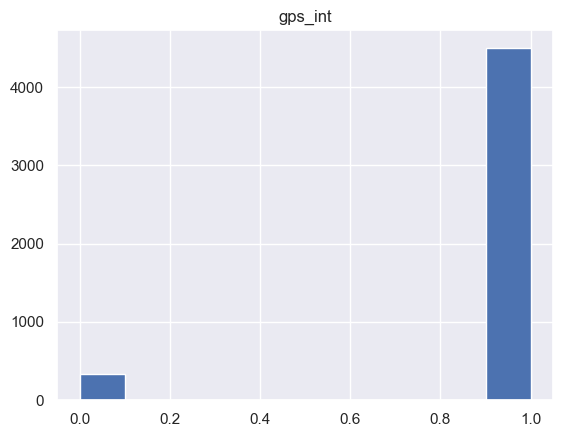

In [218]:
for i in lbool:
  print(bmw8.hist(i))

In [219]:
for i in lcat:
  print(bmw8[i].value_counts())

modelo
320                750
520                632
318                566
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
tipo_gasolina
diesel               4620
petrol                191
hybrid_petrol           8
sin_tipo_gasolina       5
Diesel                  5
electro                 3
Name: count, dtype: int64
color
black        1494
grey         1068
blue          647
white         483
sin_color     443
brown         302
silver        291
red            47
beige          37
green          14
orange          6
Name: count, dtype: int64
tipo_coche
sin_tipo_coche    1455
estate            1104
sedan              821
suv                754
hatchback          488
subcompact          77
coupe               74
convertible         30
van                 29
Name: count, dtype: int64
volante_regulable
True     2659


NORMALIZAR EL PRECIO

In [220]:
# Hacemos copia
bmw9=bmw8.copy()

In [221]:
bmw9["log_precio"] = np.log10(bmw9["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

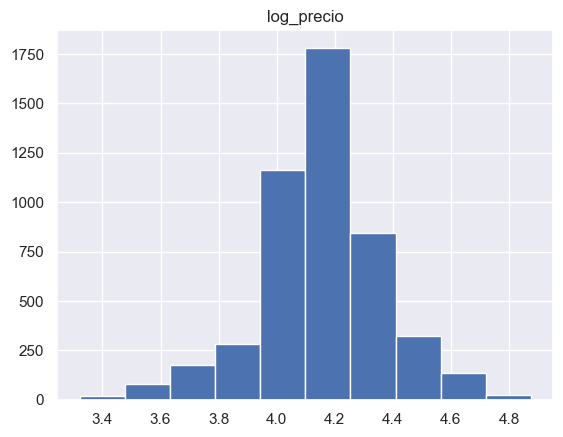

In [222]:
bmw9.hist("log_precio")

<Axes: xlabel='precio'>

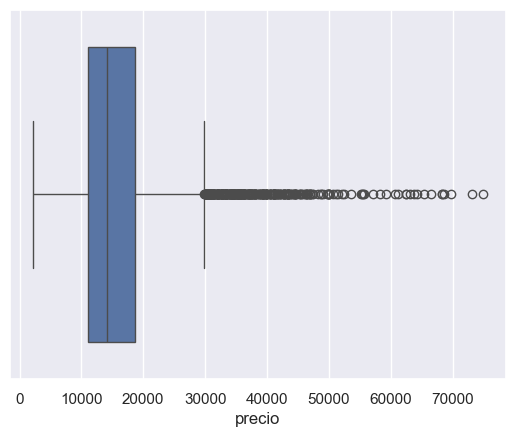

In [223]:
# Comparo el boxplot de precio con log_precio
sns.boxplot(x=bmw9["precio"])

<Axes: xlabel='log_precio'>

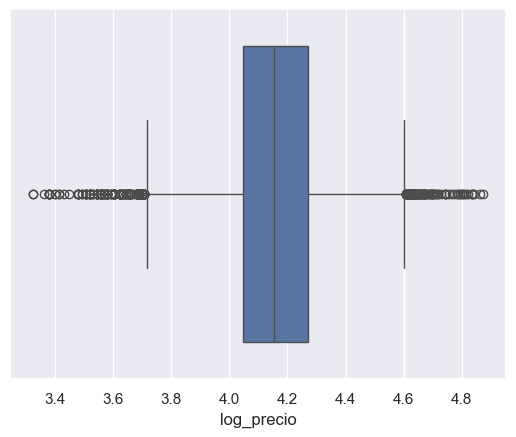

In [224]:
# Comparo el boxplot de precio con log_precio
sns.boxplot(x=bmw9["log_precio"])

In [225]:
# Actualizo mi target 
target = ["precio", "log_precio"]

TARGET VS VARIABLES INDEPENDIENTES

In [226]:
# # Análisis variable vs target, hay algún insight interesante?

<Axes: >

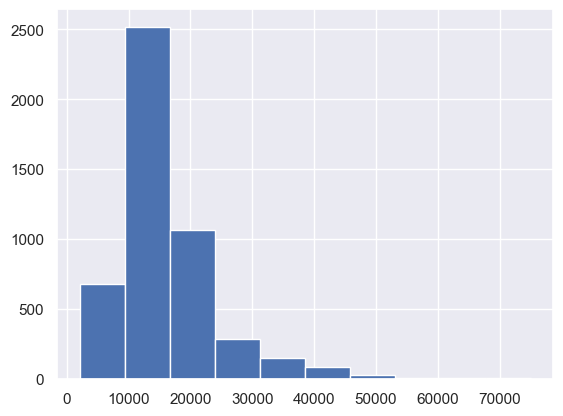

In [227]:
# Tiene una distribución bastante parecida a la normal (campana de gauss), desde que convertimos los nulos a la mediana
bmw9["precio"].hist()

<Axes: xlabel='potencia_int', ylabel='precio'>

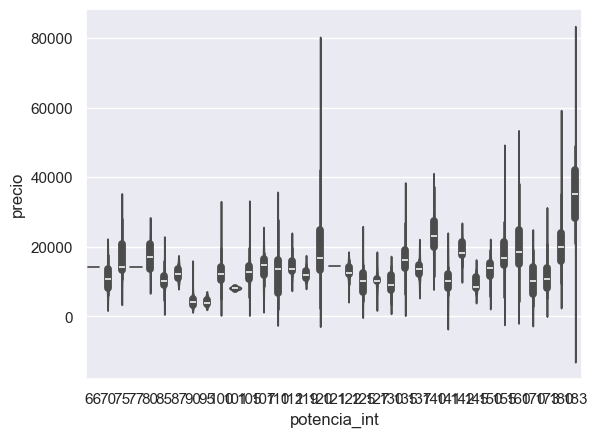

In [228]:
# Comparemos la potencia con el precio
# Con potencias de 120 o la máxima, gran rango de precio. Con potencias pequeñas, bajo rango de precio. 
sns.violinplot(x="potencia_int", y="precio", data=bmw9)

<Axes: xlabel='km_int', ylabel='precio'>

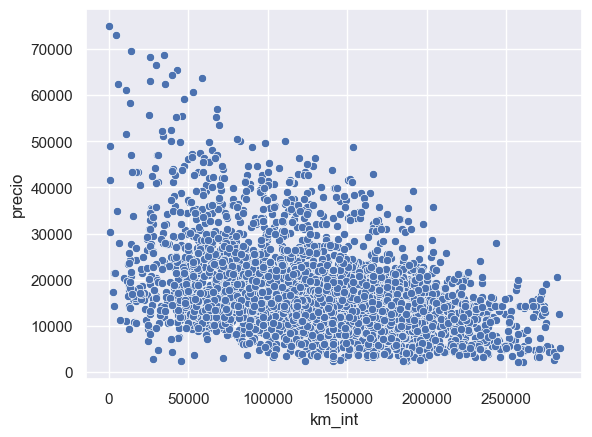

In [229]:
# Con muchos numeros, mejor aplicar un scatterplot
# De una manera genral, se puede ver que coches con más km tienden a tener menos precio, y viceversa, coches con menos km, tienen más precio). 
sns.scatterplot(x="km_int", y="precio", data=bmw9)

<Axes: xlabel='potencia_int', ylabel='precio'>

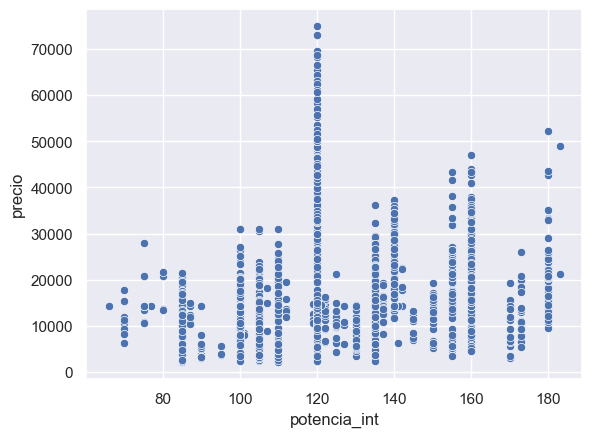

In [230]:
# Con muchos numeros, mejor aplicar un scatterplot
# Se puede ver que los coches de 120 de potencia hay todo un rango de precios. Los coches de muy baja o muy alta potencia, hay menos rango en el precio. 
sns.scatterplot(x="potencia_int", y="precio", data=bmw9)

<Axes: xlabel='km_int', ylabel='precio'>

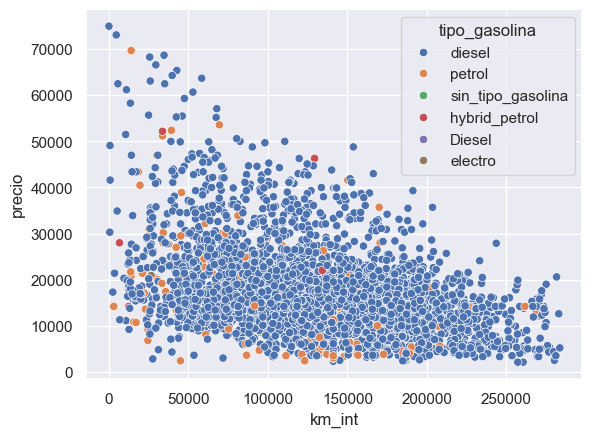

In [231]:
# Con muchos numeros, mejor aplicar un scatterplot
# Los coches híbrisos suelen ocupar posiciones más medias o elevadas de precio
# Mucha variedad de coches de diesel, seguido por petroleso, que en general son de precios bajos cuando hay algo de kilometraje. 
# Poca variedad de cohes sin tipo de gasolina, diesel o electro. 
sns.scatterplot(x="km_int", y="precio", hue="tipo_gasolina", data=bmw9)

<Axes: xlabel='km_int', ylabel='precio'>

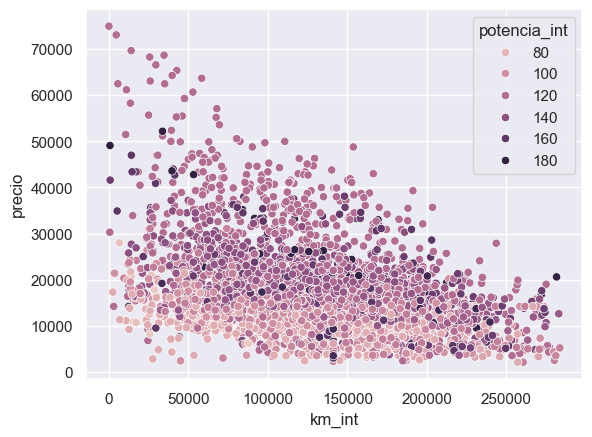

In [232]:
# Con muchos numeros, mejor aplicar un scatterplot
# Los de menos potencia, suelen ser de menos precio. De 120 de potencia, hay una gran variedad de precio y km. 
sns.scatterplot(x="km_int", y="precio", hue="potencia_int", data=bmw9)

<Axes: xlabel='volante_regulable', ylabel='precio'>

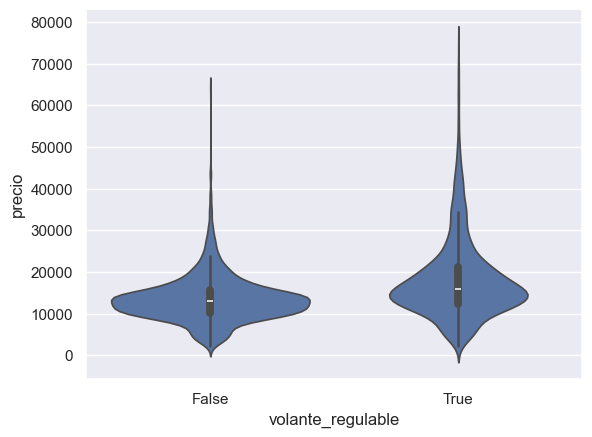

In [233]:
sns.violinplot(x="volante_regulable", y="precio", data=bmw9)

<Axes: xlabel='aire_acondicionado', ylabel='precio'>

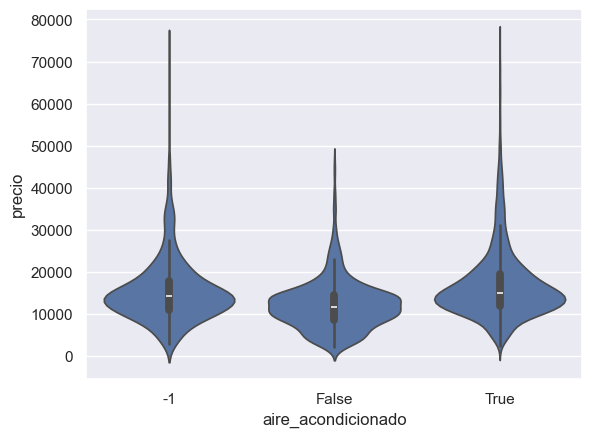

In [234]:
sns.violinplot(x="aire_acondicionado", y="precio", data=bmw9)

<Axes: xlabel='camara_trasera', ylabel='precio'>

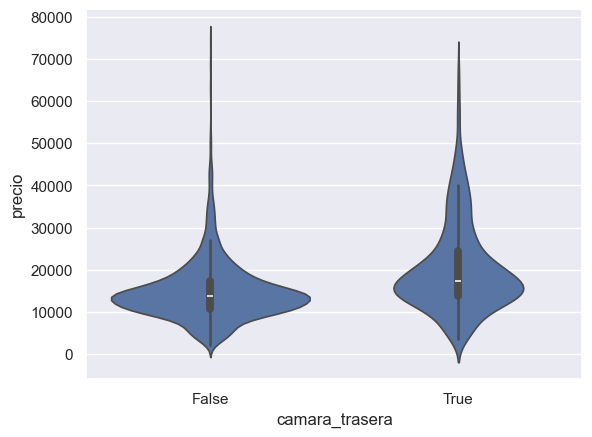

In [235]:
sns.violinplot(x="camara_trasera", y="precio", data=bmw9)

<Axes: xlabel='elevalunas_electrico', ylabel='precio'>

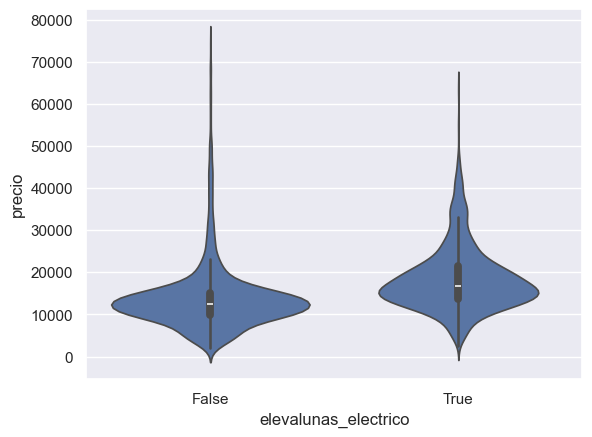

In [236]:
sns.violinplot(x="elevalunas_electrico", y="precio", data=bmw9)

<Axes: xlabel='bluetooth', ylabel='precio'>

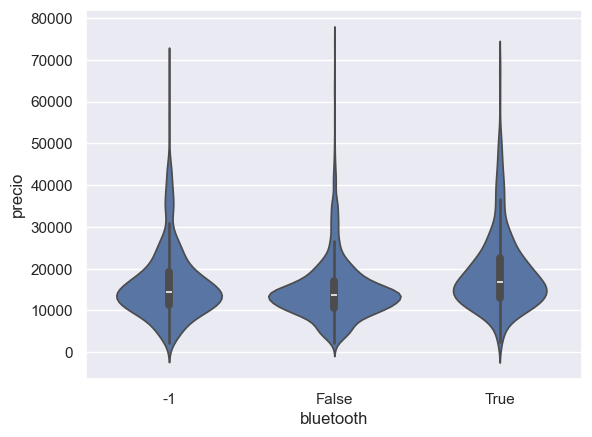

In [237]:
sns.violinplot(x="bluetooth", y="precio", data=bmw9)

<Axes: xlabel='gps_int', ylabel='precio'>

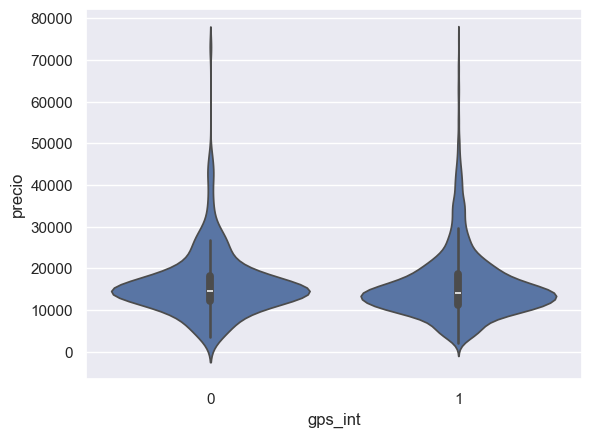

In [238]:
sns.violinplot(x="gps_int", y="precio", data=bmw9)

<Axes: xlabel='alerta_lim_velocidad', ylabel='precio'>

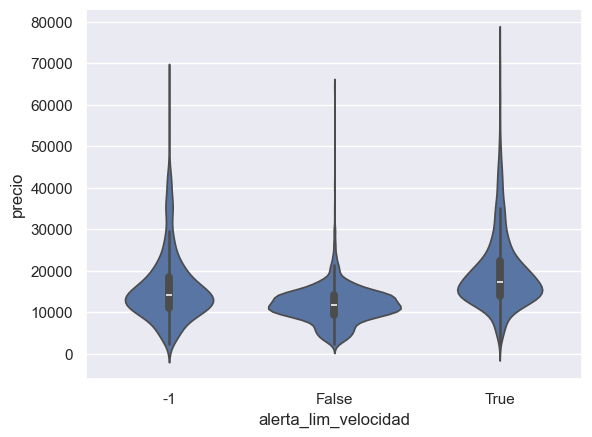

In [239]:
sns.violinplot(x="alerta_lim_velocidad", y="precio", data=bmw9)

In [240]:
# Vamos hacer un for, para hacerlo más rápido, haciendo un analisis univariable con el precio, solo analizando las categoricas

target=["precio"]
def obtener_violinplot(dataset):
  lista_categoricas=[]

  for i in dataset:
    if(dataset[i].dtype.kind=="O") and i not in (target):
      lista_categoricas.append(i)
    return sns.violinplot(x=i, y="precio", data=dataset)

In [241]:
lcat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [242]:
bmw9.head()

,modelo,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,tiempo_venta,km_int,potencia_int,gps_int,log_precio
0,118,diesel,black,sin_tipo_coche,True,True,False,True,-1,-1,11300.0,2161 days,140411,100,1,4.053078
1,M4,petrol,grey,convertible,True,True,False,False,True,True,69700.0,1767 days,13929,120,1,4.843233
2,320,diesel,white,sin_tipo_coche,False,False,False,True,False,False,10200.0,2132 days,183297,120,1,4.008600
3,420,diesel,red,convertible,True,True,False,True,True,-1,25100.0,1767 days,128035,135,1,4.399674
4,425,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,33400.0,1767 days,97097,160,1,4.523746


<Axes: xlabel='modelo', ylabel='precio'>

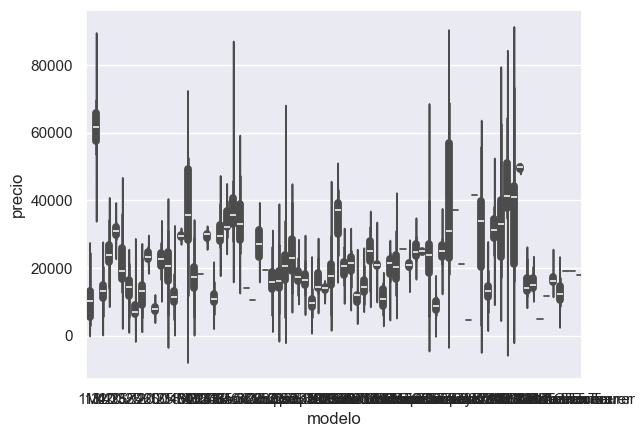

In [243]:
obtener_violinplot(bmw9)

TRANSFORMACIÓN DE CATEGORICAS A NUEMRICAS

In [294]:
# Hacemos copia
bmw10=bmw9.copy()

In [273]:
bmw10.head()

,modelo,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,tiempo_venta,km_int,potencia_int,gps_int,log_precio
0,118,diesel,black,sin_tipo_coche,True,True,False,True,-1,-1,11300.0,2161 days,140411,100,1,4.053078
1,M4,petrol,grey,convertible,True,True,False,False,True,True,69700.0,1767 days,13929,120,1,4.843233
2,320,diesel,white,sin_tipo_coche,False,False,False,True,False,False,10200.0,2132 days,183297,120,1,4.008600
3,420,diesel,red,convertible,True,True,False,True,True,-1,25100.0,1767 days,128035,135,1,4.399674
4,425,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,33400.0,1767 days,97097,160,1,4.523746


In [274]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   tipo_gasolina         4832 non-null   object         
 2   color                 4832 non-null   object         
 3   tipo_coche            4832 non-null   object         
 4   volante_regulable     4832 non-null   object         
 5   aire_acondicionado    4832 non-null   object         
 6   camara_trasera        4832 non-null   object         
 7   elevalunas_electrico  4832 non-null   object         
 8   bluetooth             4832 non-null   object         
 9   alerta_lim_velocidad  4832 non-null   object         
 10  precio                4832 non-null   float64        
 11  tiempo_venta          4832 non-null   timedelta64[ns]
 12  km_int                4832 non-null   int32          
 13  potencia

numericos : cambio tiempo_venta a numero 

In [280]:
# Transformo la columna de tiempo_venta a segundos, para tener un numerico
bmw10["tiempo_venta"] = bmw10["tiempo_venta"]/np.timedelta64(1, 's')

In [265]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4832 non-null   object 
 1   tipo_gasolina         4832 non-null   object 
 2   color                 4832 non-null   object 
 3   tipo_coche            4832 non-null   object 
 4   volante_regulable     4832 non-null   object 
 5   aire_acondicionado    4832 non-null   object 
 6   camara_trasera        4832 non-null   object 
 7   elevalunas_electrico  4832 non-null   object 
 8   bluetooth             4832 non-null   object 
 9   alerta_lim_velocidad  4832 non-null   object 
 10  precio                4832 non-null   float64
 11  tiempo_venta          4832 non-null   float64
 12  km_int                4832 non-null   int32  
 13  potencia_int          4832 non-null   int32  
 14  gps_int               4832 non-null   int32  
 15  log_precio            4832

In [266]:
bmw10.head()

,modelo,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,tiempo_venta,km_int,potencia_int,gps_int,log_precio
0,118,diesel,black,sin_tipo_coche,True,True,False,True,-1,-1,11300.0,186710400.0,140411,100,1,4.053078
1,M4,petrol,grey,convertible,True,True,False,False,True,True,69700.0,152668800.0,13929,120,1,4.843233
2,320,diesel,white,sin_tipo_coche,False,False,False,True,False,False,10200.0,184204800.0,183297,120,1,4.008600
3,420,diesel,red,convertible,True,True,False,True,True,-1,25100.0,152668800.0,128035,135,1,4.399674
4,425,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,33400.0,152668800.0,97097,160,1,4.523746


In [281]:
lnum.append("tiempo_venta")

In [282]:
lnum

['km_int', 'potencia_int', 'tiempo_venta']

categoricas: cambio a numero

In [288]:
lcat

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'alerta_lim_velocidad']

In [296]:
bmw11 = pd.get_dummies(data=bmw10, columns=bmw10["modelo"])

KeyError: "None of [Index(['118', 'M4', '320', '420', '425', '335', '325', '118', 'Z4', '320',\n       ...\n       '216 Active Tourer', '218 Gran Tourer', '218 Active Tourer',\n       '218 Active Tourer', '218 Gran Tourer', '218 Gran Tourer',\n       '218 Active Tourer', '218 Gran Tourer', '218 Active Tourer', '525'],\n      dtype='object', length=4832)] are in the [columns]"

In [293]:
bmw11.head()

,precio,tiempo_venta,km_int,potencia_int,gps_int,log_precio,modelo_ Active Tourer,modelo_114,modelo_116,modelo_118,...,camara_trasera_False,camara_trasera_True,elevalunas_electrico_False,elevalunas_electrico_True,bluetooth_-1,bluetooth_False,bluetooth_True,alerta_lim_velocidad_-1,alerta_lim_velocidad_False,alerta_lim_velocidad_True
0,11300.0,2161 days,140411,100,1,4.053078,False,False,False,True,...,True,False,False,True,True,False,False,True,False,False
1,69700.0,1767 days,13929,120,1,4.843233,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
2,10200.0,2132 days,183297,120,1,4.008600,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
3,25100.0,1767 days,128035,135,1,4.399674,False,False,False,False,...,True,False,False,True,False,False,True,True,False,False
4,33400.0,1767 days,97097,160,1,4.523746,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True


NORMALIZAR VARIABLES NUMERICAS 

In [ ]:
# minmaxscaler y esas cosas...

In [ ]:
bmw10.head()

,modelo,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,fecha_venta,km_int,potencia_int,gps_int,log_precio
0,118,2012-02-01,diesel,black,sin_tipo_coche,True,True,False,True,-1,-1,11300.0,2018-01-01,140411,100,1,4.053078
1,M4,sin_fecha_registro,petrol,grey,convertible,True,True,False,False,True,True,69700.0,2018-02-01,13929,120,1,4.843233
2,320,2012-04-01,diesel,white,sin_tipo_coche,False,False,False,True,False,False,10200.0,2018-02-01,183297,120,1,4.008600
3,420,sin_fecha_registro,diesel,red,convertible,True,True,False,True,True,-1,25100.0,2018-02-01,128035,135,1,4.399674
4,425,sin_fecha_registro,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,33400.0,2018-04-01,97097,160,1,4.523746


- km_int

In [ ]:
# Ya se parece una distribucion normal, aun asi, vamos a aplicar el logaritmo

In [ ]:
bmw10

,modelo,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,fecha_venta,km_int,potencia_int,gps_int,log_precio
0,118,2012-02-01,diesel,black,sin_tipo_coche,True,True,False,True,-1,-1,11300.0,2018-01-01,140411,100,1,4.053078
1,M4,sin_fecha_registro,petrol,grey,convertible,True,True,False,False,True,True,69700.0,2018-02-01,13929,120,1,4.843233
2,320,2012-04-01,diesel,white,sin_tipo_coche,False,False,False,True,False,False,10200.0,2018-02-01,183297,120,1,4.008600
3,420,sin_fecha_registro,diesel,red,convertible,True,True,False,True,True,-1,25100.0,2018-02-01,128035,135,1,4.399674
4,425,sin_fecha_registro,diesel,silver,sin_tipo_coche,True,True,False,False,True,True,33400.0,2018-04-01,97097,160,1,4.523746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,sin_fecha_registro,diesel,black,sin_tipo_coche,False,True,False,False,False,False,14600.0,2018-08-01,39743,110,1,4.164353
4839,218 Active Tourer,2015-06-01,diesel,grey,sin_tipo_coche,False,True,False,False,False,True,17500.0,2018-08-01,49832,100,1,4.243038
4840,218 Gran Tourer,2015-10-01,diesel,grey,van,False,True,False,False,False,True,17000.0,2018-09-01,19633,110,1,4.230449
4841,218 Active Tourer,2016-04-01,diesel,brown,van,True,True,False,False,False,True,22700.0,2018-09-01,27920,110,1,4.356026


- potencia_int

REESCALAR VARIABLES

CORRELACION FINAL

In [ ]:
# Análisis de correlación final, hay alguna variable correlacionada?